# TABLE OF CONTENTS:
---
* [Notebook Summary](#Notebook-Summary)
* [Setup](#Setup)
    * [Connect to Workspace](#Connect-to-Workspace)
* [Data](#Data)
    * [Overview](#Overview)
    * [Download & Extract Data](#Download-&-Extract-Data)
    * [Upload Data](#Upload-Data)
    * [Explore Data](#Explore-Data)
    * [Create and Register AML Dataset](#Create-and-Register-AML-Dataset)
---

# Notebook Summary

This notebook will download the [stanford dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) from the stanford vision website to the local compute and then upload it to the Azure Machine Learning (AML) workspace default blob storage. It will also create an AML file dataset that can be used for easy data access during training.

# Setup

Append. parent directory to sys path to be able to import created modules from src directory.

In [1]:
import sys
sys.path.append(os.path.dirname(os.path.abspath("")))

Automatically reload modules when changes are made.

In [2]:
%load_ext autoreload
%autoreload 2

Import libraries and modules.

In [3]:
# Import libraries
import azureml.core
import torchvision
from azureml.core import Dataset, Workspace

# Import created modules
from src.utils import download_stanford_dogs_archives, extract_stanford_dogs_archives, load_data, show_image, show_batch_of_images

print(f"azureml.core version: {azureml.core.VERSION}")

azureml.core version: 1.20.0


### Connect to Workspace

In order to connect and communicate with the AML workspace, a workspace object needs to be instantiated using the AML SDK.

In [4]:
# Connect to the AML workspace using interactive authentication
ws = Workspace.from_config()

# Data

### Overview

The [stanford dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) is an image dataset that will be used to train a multiclass dog breed classification model. In total there are 120 different dog breeds/classes and 20,580 images. The dataset has been built using images and annotations from ImageNet for the task of fine-grained image categorization. The images are three-channel color images of variable pixels in size. While a file with a given train/test split can be downloaded from the website, the train dataset will be further split into a validation and train set (80:20). This will ultimately lead into a data distribution as follows:
- 9600 training images (47.65%)
- 2400 validation images (11.66%)
- 8580 test images (41.69%)

### Download & Extract Data

Download the data to the local compute.

A utility file with functions to download the dogs dataset archive files from the stanford vision website and to extract the archives into a format expected by the [torchvision.datasets.ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) has been created (`../src/utils/data_utils.py`).

In [5]:
# Download the dataset archive files
download_stanford_dogs_archives()

0it [00:00, ?it/s]

Directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/amlbrikseci/code/Users/BRIKSE/pytorch-use-cases-azure-ml/stanford_dogs/data/archives/images has been removed.


100%|█████████▉| 792133632/793579520 [00:52<00:00, 18840759.95it/s]
0it [00:00, ?it/s]

Directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/amlbrikseci/code/Users/BRIKSE/pytorch-use-cases-azure-ml/stanford_dogs/data/archives/lists has been removed.



 89%|████████▊ | 425984/481280 [00:02<00:00, 383467.55it/s]

In [6]:
# Extract the dataset archives and remove them after extraction
extract_stanford_dogs_archives()

793583616it [01:10, 18840759.95it/s]                               
483328it [00:19, 383467.55it/s]                            

Directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/amlbrikseci/code/Users/BRIKSE/pytorch-use-cases-azure-ml/stanford_dogs/data/train has been removed.
Directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/amlbrikseci/code/Users/BRIKSE/pytorch-use-cases-azure-ml/stanford_dogs/data/val has been removed.


793583616it [05:52, 2249783.20it/s] 
483328it [04:51, 1656.61it/s]  

Directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/amlbrikseci/code/Users/BRIKSE/pytorch-use-cases-azure-ml/stanford_dogs/data/test has been removed.


Lists.tar archive has been extracted successfully.
File lists have been read successfully.
Extracting images.tar archive...


100%|██████████| 20701/20701 [49:47<00:00,  6.93it/s]   


Images.tar archive has been extracted successfully.
Removing archive files.


### Upload Data

Upload the data to the default AML datastore.

In [7]:
datastore = ws.get_default_datastore()
datastore.upload(src_dir="../data", target_path="data/stanford_dogs", overwrite=True)

Uploading an estimated of 20580 files
Uploading ../data/test/n02085620-Chihuahua/n02085620_10074.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_10074.jpg, 1 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_10131.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_10131.jpg, 2 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_1073.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_1073.jpg, 3 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11337.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_11337.jpg, 4 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11477.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_11477.jpg, 5 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11696.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_1169

Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1143.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1143.jpg, 55 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1503.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1503.jpg, 56 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1600.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1600.jpg, 57 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1610.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1610.jpg, 58 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1626.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1626.jpg, 59 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1665.jpg
Uploaded ../data/test

Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_38.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_38.jpg, 112 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_3855.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_3855.jpg, 113 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_4458.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_4458.jpg, 114 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_4579.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_4579.jpg, 115 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_4698.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_4698.jpg, 116 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_4798.jpg
Uploaded ../data/tes

Uploading ../data/test/n02085936-Maltese_dog/n02085936_22167.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_22167.jpg, 179 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_3239.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3239.jpg, 180 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_3326.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3326.jpg, 181 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_3348.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3348.jpg, 182 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_3396.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3396.jpg, 183 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_3580.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3580.jpg, 184 f

Uploading ../data/test/n02085936-Maltese_dog/n02085936_5766.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_5766.jpg, 231 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_5789.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_5789.jpg, 232 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_6077.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_6077.jpg, 233 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_6278.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_6278.jpg, 234 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_66.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_66.jpg, 235 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_6656.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_6656.jpg, 236 files o

Uploading ../data/test/n02086079-Pekinese/n02086079_7027.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_7027.jpg, 313 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_7817.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_7817.jpg, 314 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_904.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_904.jpg, 315 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_9316.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_9316.jpg, 316 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_11551.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_11551.jpg, 317 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_11692.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_11692.jpg, 318 files out of an estimated total of 20

Uploading ../data/test/n02086240-Shih-Tzu/n02086240_3827.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_3827.jpg, 367 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_3961.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_3961.jpg, 368 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_4190.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_4190.jpg, 369 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_4255.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_4255.jpg, 370 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_4449.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_4449.jpg, 371 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_4544.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_4544.jpg, 372 files out of an estimated total of 2058

Uploading ../data/test/n02086240-Shih-Tzu/n02086240_756.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_756.jpg, 418 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_762.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_762.jpg, 419 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_7728.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_7728.jpg, 420 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_8108.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_8108.jpg, 421 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_9750.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_9750.jpg, 422 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_1002.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_1002.jpg, 423 files out of an estimated t

Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2621.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2621.jpg, 464 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2731.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2731.jpg, 465 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2805.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2805.jpg, 466 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2932.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2932.jpg, 467 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2955.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2955.jpg, 468 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_3.jpg
Uploaded ../data/te

Uploading ../data/test/n02086910-papillon/n02086910_1048.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_1048.jpg, 513 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_1475.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_1475.jpg, 514 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_1492.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_1492.jpg, 515 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_1826.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_1826.jpg, 516 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_1921.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_1921.jpg, 517 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_1971.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_1971.jpg, 518 files out of an estimated total of 2058

Uploading ../data/test/n02086910-papillon/n02086910_4607.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_4607.jpg, 566 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_5547.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_5547.jpg, 567 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_5932.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_5932.jpg, 568 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_6306.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_6306.jpg, 569 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_685.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_685.jpg, 570 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_6931.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_6931.jpg, 571 files out of an estimated total of 20580


Uploading ../data/test/n02087046-toy_terrier/n02087046_5325.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_5325.jpg, 657 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_5347.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_5347.jpg, 658 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_5499.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_5499.jpg, 659 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_5541.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_5541.jpg, 660 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_6179.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_6179.jpg, 661 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_6266.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_6266.jpg, 662 fil

Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7219.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7219.jpg, 711 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7418.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7418.jpg, 712 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7439.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7439.jpg, 713 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7449.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7449.jpg, 714 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7459.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7459.jpg, 715 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n0

Uploading ../data/test/n02088094-Afghan_hound/n02088094_1459.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_1459.jpg, 799 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3051.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3051.jpg, 800 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3057.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3057.jpg, 801 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3059.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3059.jpg, 802 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3080.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3080.jpg, 803 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3119.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3119.

Uploading ../data/test/n02088094-Afghan_hound/n02088094_5413.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_5413.jpg, 849 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_5939.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_5939.jpg, 850 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_6493.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_6493.jpg, 851 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_713.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_713.jpg, 852 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_7146.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_7146.jpg, 853 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_732.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_732.jpg,

Uploading ../data/test/n02088238-basset/n02088238_12160.jpg
Uploaded ../data/test/n02088238-basset/n02088238_12160.jpg, 900 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_13799.jpg
Uploaded ../data/test/n02088238-basset/n02088238_13799.jpg, 901 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_2009.jpg
Uploaded ../data/test/n02088238-basset/n02088238_2009.jpg, 902 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_2646.jpg
Uploaded ../data/test/n02088238-basset/n02088238_2646.jpg, 903 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_3066.jpg
Uploaded ../data/test/n02088238-basset/n02088238_3066.jpg, 904 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_3359.jpg
Uploaded ../data/test/n02088238-basset/n02088238_3359.jpg, 905 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02088364-beagle/n02088364_2106.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_2106.jpg, 1006 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_2143.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_2143.jpg, 1007 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_2502.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_2502.jpg, 1008 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_2652.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_2652.jpg, 1009 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_4237.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_4237.jpg, 1010 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_427.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_427.jpg, 1011 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02088466-bloodhound/n02088466_7710.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_7710.jpg, 1101 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_8320.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_8320.jpg, 1102 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_8422.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_8422.jpg, 1103 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_8820.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_8820.jpg, 1104 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_8969.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_8969.jpg, 1105 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9046.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9046.jpg, 1106 files out

Uploading ../data/test/n02088632-bluetick/n02088632_1765.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_1765.jpg, 1152 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_301.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_301.jpg, 1153 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_3667.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_3667.jpg, 1154 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_3737.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_3737.jpg, 1155 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_3828.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_3828.jpg, 1156 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_4002.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_4002.jpg, 1157 files out of an estimated total of 

Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_4422.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_4422.jpg, 1242 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1048.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1048.jpg, 1243 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1082.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1082.jpg, 1244 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1240.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1240.jpg, 1245 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1295.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1295.jpg, 1246 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1381.jpg
Uploaded ../data/test/n02089867-W

Uploading ../data/test/n02089867-Walker_hound/n02089867_953.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_953.jpg, 1291 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1.jpg, 1292 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1066.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1066.jpg, 1293 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1076.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1076.jpg, 1294 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1324.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1324.jpg, 1295 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1356.jpg
Uploaded ../data/test/n0208

Uploading ../data/test/n02090379-redbone/n02090379_1006.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1006.jpg, 1344 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_1360.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1360.jpg, 1345 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_1379.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1379.jpg, 1346 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_1438.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1438.jpg, 1347 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_1698.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1698.jpg, 1348 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_1736.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1736.jpg, 1349 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02090622-borzoi/n02090622_5211.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_5211.jpg, 1413 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_6495.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_6495.jpg, 1414 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_6588.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_6588.jpg, 1415 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_6979.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_6979.jpg, 1416 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_7174.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_7174.jpg, 1417 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_7409.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_7409.jpg, 1418 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4326.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4326.jpg, 1513 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4376.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4376.jpg, 1514 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4433.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4433.jpg, 1515 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_503.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_503.jpg, 1516 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_5049.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_5049.jpg, 1517 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_519.jpg
Uploaded ../data/test/n02

Uploading ../data/test/n02091032-Italian_greyhound/n02091032_6728.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_6728.jpg, 1603 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_6817.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_6817.jpg, 1604 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_769.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_769.jpg, 1605 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_7838.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_7838.jpg, 1606 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_8265.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_8265.jpg, 1607 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_8369.jpg
Up

Uploading ../data/test/n02091134-whippet/n02091134_4078.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_4078.jpg, 1705 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_7310.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_7310.jpg, 1706 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_100.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_100.jpg, 1707 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_1045.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_1045.jpg, 1708 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_1072.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_1072.jpg, 1709 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_1182.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_1182.jpg, 1710 files o

Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3438.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3438.jpg, 1754 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3552.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3552.jpg, 1755 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3748.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3748.jpg, 1756 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3800.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3800.jpg, 1757 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3840.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3840.jpg, 1758 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3921.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_

Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_4492.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_4492.jpg, 1836 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_4560.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_4560.jpg, 1837 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5019.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5019.jpg, 1838 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5654.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5654.jpg, 1839 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5755.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5755.jpg, 1840 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n0209146

Uploading ../data/test/n02091635-otterhound/n02091635_1367.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_1367.jpg, 1881 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_1808.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_1808.jpg, 1882 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_1860.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_1860.jpg, 1883 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_2014.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_2014.jpg, 1884 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_2569.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_2569.jpg, 1885 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_2594.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_2594.jpg, 1886 files out

Uploading ../data/test/n02091831-Saluki/n02091831_355.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_355.jpg, 1978 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_3643.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_3643.jpg, 1979 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_4966.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_4966.jpg, 1980 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_5123.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_5123.jpg, 1981 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_5216.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_5216.jpg, 1982 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_5359.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_5359.jpg, 1983 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_1439.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_1439.jpg, 2029 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_1451.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_1451.jpg, 2030 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_14540.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_14540.jpg, 2031 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_14771.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_14771.jpg, 2032 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_149.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_149.jpg, 2033 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092

Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_1130.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_1130.jpg, 2109 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_2257.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_2257.jpg, 2110 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_2859.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_2859.jpg, 2111 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_6302.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_6302.jpg, 2112 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_6618.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_6618.jpg, 2113 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n0209200

Uploading ../data/test/n02092339-Weimaraner/n02092339_5120.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_5120.jpg, 2187 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_6269.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_6269.jpg, 2188 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_6410.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_6410.jpg, 2189 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_642.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_642.jpg, 2190 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_6548.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_6548.jpg, 2191 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_707.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_707.jpg, 2192 files out of 

Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_5325.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_5325.jpg, 2245 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_6177.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_6177.jpg, 2246 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_6665.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_6665.jpg, 2247 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_718.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_718.jpg, 2248 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg, 2249 files out of an estim

Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_1378.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_1378.jpg, 2292 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_19906.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_19906.jpg, 2293 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3331.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3331.jpg, 2294 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_5416.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_5416.jpg, 2295 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_5617.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n020

Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_2743.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_2743.jpg, 2351 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_291.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_291.jpg, 2352 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_2941.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_2941.jpg, 2353 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_2951.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_2951.jpg, 2354 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3049.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3049.jpg, 2355 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_

Uploading ../data/test/n02093754-Border_terrier/n02093754_373.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_373.jpg, 2406 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_4582.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_4582.jpg, 2407 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_4721.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_4721.jpg, 2408 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_5170.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_5170.jpg, 2409 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_5175.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_5175.jpg, 2410 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_5192.jpg
Uploaded ../data/test/n02093754-Bor

Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_2073.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_2073.jpg, 2501 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_324.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_324.jpg, 2502 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_3258.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_3258.jpg, 2503 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_3272.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_3272.jpg, 2504 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_3391.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_3391.jpg, 2505 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_

Uploading ../data/test/n02093991-Irish_terrier/n02093991_913.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_913.jpg, 2598 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1459.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1459.jpg, 2599 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1637.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1637.jpg, 2600 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1676.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1676.jpg, 2601 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1698.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1698.jpg, 2602 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1743.jpg
Uploaded ../data/test/n02094

Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_4501.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_4501.jpg, 2650 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_4611.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_4611.jpg, 2651 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_482.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_482.jpg, 2652 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_515.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_515.jpg, 2653 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_550.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_550.jpg, 2654 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_815.jpg
Uploaded ../data/test/n020941

Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1030.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1030.jpg, 2746 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1324.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1324.jpg, 2747 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1483.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1483.jpg, 2748 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1869.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1869.jpg, 2749 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_194.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_194.jpg, 2750 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_2114.jpg
Up

Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2609.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2609.jpg, 2836 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2827.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2827.jpg, 2837 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2876.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2876.jpg, 2838 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3054.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3054.jpg, 2839 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3185.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3185.jpg, 2840 files out of an estimated total of 20580
Uploading 

Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5010.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_5010.jpg, 2916 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5148.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_5148.jpg, 2917 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5484.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_5484.jpg, 2918 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5800.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_5800.jpg, 2919 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_586.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_586.jpg, 2920 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_6085.jpg
Uploaded ../d

Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1397.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_1397.jpg, 2961 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1854.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_1854.jpg, 2962 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_2162.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_2162.jpg, 2963 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_2539.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_2539.jpg, 2964 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_270.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_270.jpg, 2965 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_2769.jpg
Uploaded ../d

Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4030.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4030.jpg, 3007 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4416.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4416.jpg, 3008 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4774.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4774.jpg, 3009 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4796.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4796.jpg, 3010 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_5611.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_5611.jpg, 3011 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_5628.jpg
Uploaded ..

Uploading ../data/test/n02096051-Airedale/n02096051_7132.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_7132.jpg, 3101 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_7463.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_7463.jpg, 3102 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_7602.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_7602.jpg, 3103 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_7647.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_7647.jpg, 3104 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_7677.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_7677.jpg, 3105 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_8132.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_8132.jpg, 3106 files out of an estimated total o

Uploading ../data/test/n02096177-cairn/n02096177_5150.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_5150.jpg, 3200 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_599.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_599.jpg, 3201 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_627.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_627.jpg, 3202 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_6769.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_6769.jpg, 3203 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_7574.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_7574.jpg, 3204 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_7877.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_7877.jpg, 3205 files out of an estimated total of 20580
Uploading ../data/test/n02096177

Uploading ../data/test/n02096294-Australian_terrier/n02096294_2206.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_2206.jpg, 3250 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_3679.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_3679.jpg, 3251 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_3866.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_3866.jpg, 3252 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_412.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_412.jpg, 3253 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_4137.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_4137.jpg, 3254 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_

Uploading ../data/test/n02096294-Australian_terrier/n02096294_6131.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_6131.jpg, 3300 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_7732.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_7732.jpg, 3301 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8025.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8025.jpg, 3302 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8157.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8157.jpg, 3303 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8255.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8255.jpg, 3304 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n0209629

Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1207.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_1207.jpg, 3349 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_183.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_183.jpg, 3350 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_2309.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_2309.jpg, 3351 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_2508.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_2508.jpg, 3352 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_2771.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_2771.jpg, 3353 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_2783.jpg
Uploaded ../data/test/n02096437-Dan

Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_702.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_702.jpg, 3400 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_728.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_728.jpg, 3401 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_820.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_820.jpg, 3402 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_10846.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_10846.jpg, 3403 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_11476.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_11476.jpg, 3404 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_11817.jpg
Uploaded ../data/test/n02096585-Boston_bull/n0209

Uploading ../data/test/n02096585-Boston_bull/n02096585_414.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_414.jpg, 3450 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_4774.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_4774.jpg, 3451 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_6028.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_6028.jpg, 3452 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_664.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_664.jpg, 3453 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_7933.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_7933.jpg, 3454 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_8065.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_8065.jpg, 3455 f

Uploading ../data/test/n02097130-giant_schnauzer/n02097130_3005.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_3005.jpg, 3538 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_32.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_32.jpg, 3539 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_3268.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_3268.jpg, 3540 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_344.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_344.jpg, 3541 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_3619.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_3619.jpg, 3542 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_3891.jpg
Uploaded ../data/test/n02097

Uploading ../data/test/n02097209-standard_schnauzer/n02097209_1063.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_1063.jpg, 3595 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_1337.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_1337.jpg, 3596 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_1377.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_1377.jpg, 3597 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_2084.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_2084.jpg, 3598 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_2509.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_2509.jpg, 3599 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n0209720

Uploading ../data/test/n02097298-Scotch_terrier/n02097298_946.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_946.jpg, 3687 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_1070.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_1070.jpg, 3688 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_1156.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_1156.jpg, 3689 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_124.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_124.jpg, 3690 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_1278.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_1278.jpg, 3691 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_1533.jpg
Uploaded ../data/test/n02097

Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_4889.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_4889.jpg, 3734 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_4959.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_4959.jpg, 3735 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_5007.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_5007.jpg, 3736 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_5091.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_5091.jpg, 3737 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_5140.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_5140.jpg, 3738 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_5182.jpg
Uploaded ../data/test/

Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_7595.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_7595.jpg, 3784 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_8272.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_8272.jpg, 3785 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_8491.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_8491.jpg, 3786 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_8583.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_8583.jpg, 3787 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_86.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_86.jpg, 3788 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_8609.jpg
Uploaded ../data/test/n020

Uploading ../data/test/n02097658-silky_terrier/n02097658_4728.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_4728.jpg, 3875 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_942.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_942.jpg, 3876 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_953.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_953.jpg, 3877 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_98.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_98.jpg, 3878 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_9987.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_9987.jpg, 3879 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_1024.jpg
Uploaded ../data/test/n02098105-soft-c

Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_597.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_597.jpg, 3920 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_707.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_707.jpg, 3921 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_732.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_732.jpg, 3922 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_773.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_773.jpg, 3923 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_82.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_82.jpg, 3924 files out of an estimat

Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_830.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_830.jpg, 4011 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_945.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_945.jpg, 4012 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_1471.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_1471.jpg, 4013 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_14953.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_14953.jpg, 4014 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_16861.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_16861.jpg, 4015 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_17759.jpg
Uploaded ../data/test/n02098413-Lhasa/n0209

Uploading ../data/test/n02098413-Lhasa/n02098413_49.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_49.jpg, 4062 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_6737.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_6737.jpg, 4063 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_6923.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_6923.jpg, 4064 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_7441.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_7441.jpg, 4065 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_754.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_754.jpg, 4066 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_7546.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_7546.jpg, 4067 files out of an estimated total of 20580
Uploading ../data/test/n02098413-L

Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_109.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_109.jpg, 4153 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_1150.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_1150.jpg, 4154 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_120.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_120.jpg, 4155 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_2504.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_2504.jpg, 4156 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_2570.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_2570.jpg, 4157 files out of an estimated total of 20580
Uploading ../data/test/n

Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_853.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_853.jpg, 4202 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_2358.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_2358.jpg, 4203 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_2994.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_2994.jpg, 4204 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_4005.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_4005.jpg, 4205 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_4651.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_4651.jpg, 4206 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_4933.jpg
U

Uploading ../data/test/n02099712-Labrador_retriever/n02099712_1414.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_1414.jpg, 4250 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_1660.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_1660.jpg, 4251 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_2174.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_2174.jpg, 4252 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_3829.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_3829.jpg, 4253 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_3854.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_3854.jpg, 4254 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n0209971

Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3316.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3316.jpg, 4335 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3346.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3346.jpg, 4336 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3429.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3429.jpg, 4337 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3645.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3645.jpg, 4338 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3911.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3911.jpg, 4339 files out of an estimated total of 20580


Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_4646.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_4646.jpg, 4378 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_2423.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_2423.jpg, 4379 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_2893.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_2893.jpg, 4380 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_3025.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_3025.jpg, 4381 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_3259.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_3259.jpg, 4382 files out of an e

Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_5551.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_5551.jpg, 4423 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12216.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12216.jpg, 4424 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12308.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12308.jpg, 4425 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12468.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12468.jpg, 4426 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12660.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12660.jpg, 4427 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_13297.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_13297.jpg, 4428 files

Uploading ../data/test/n02100735-English_setter/n02100735_10107.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_10107.jpg, 4476 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_10211.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_10211.jpg, 4477 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_10257.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_10257.jpg, 4478 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_2444.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_2444.jpg, 4479 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_3458.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_3458.jpg, 4480 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_3567.jpg
Uploaded ../data/test/n0210

Uploading ../data/test/n02100877-Irish_setter/n02100877_3936.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_3936.jpg, 4566 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_5686.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_5686.jpg, 4567 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_6998.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_6998.jpg, 4568 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_71.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_71.jpg, 4569 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_722.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_722.jpg, 4570 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_738.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_738.jpg

Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_10502.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_10502.jpg, 4648 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_1249.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_1249.jpg, 4649 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_2076.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_2076.jpg, 4650 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_3003.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_3003.jpg, 4651 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_3365.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_3365.jpg, 4652 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_3673.jpg
Uploaded 

Uploading ../data/test/n02102040-English_springer/n02102040_1201.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_1201.jpg, 4747 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_2986.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_2986.jpg, 4748 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_35.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_35.jpg, 4749 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_358.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_358.jpg, 4750 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_3586.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_3586.jpg, 4751 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_3767.jpg
Uploaded ../data/

Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_3928.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_3928.jpg, 4827 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_626.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_626.jpg, 4828 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_10000.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_10000.jpg, 4829 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_10019.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_10019.jpg, 4830 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_10157.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_10157.jpg, 4831 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_10261.

Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_4640.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_4640.jpg, 4916 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_4698.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_4698.jpg, 4917 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5021.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5021.jpg, 4918 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_582.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_582.jpg, 4919 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5937.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5937.jpg, 4920 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_6174.jpg
Uploaded ../data/test/n02102480-Sus

Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_3694.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_3694.jpg, 4967 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_4087.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_4087.jpg, 4968 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_4253.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_4253.jpg, 4969 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_4459.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_4459.jpg, 4970 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_4469.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_4469.jpg, 4971 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spani

Uploading ../data/test/n02104365-schipperke/n02104365_6551.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_6551.jpg, 5066 files out of an estimated total of 20580
Uploading ../data/test/n02104365-schipperke/n02104365_740.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_740.jpg, 5067 files out of an estimated total of 20580
Uploading ../data/test/n02104365-schipperke/n02104365_7641.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_7641.jpg, 5068 files out of an estimated total of 20580
Uploading ../data/test/n02104365-schipperke/n02104365_7791.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_7791.jpg, 5069 files out of an estimated total of 20580
Uploading ../data/test/n02104365-schipperke/n02104365_7822.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_7822.jpg, 5070 files out of an estimated total of 20580
Uploading ../data/test/n02104365-schipperke/n02104365_7859.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_7859.jpg, 5071 files out o

Uploading ../data/test/n02105162-malinois/n02105162_6013.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6013.jpg, 5156 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6220.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6220.jpg, 5157 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6275.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6275.jpg, 5158 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6343.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6343.jpg, 5159 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6377.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6377.jpg, 5160 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6489.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6489.jpg, 5161 files out of an estimated total o

Uploading ../data/test/n02105251-briard/n02105251_6883.jpg
Uploaded ../data/test/n02105251-briard/n02105251_6883.jpg, 5208 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_6984.jpg
Uploaded ../data/test/n02105251-briard/n02105251_6984.jpg, 5209 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_7058.jpg
Uploaded ../data/test/n02105251-briard/n02105251_7058.jpg, 5210 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_7090.jpg
Uploaded ../data/test/n02105251-briard/n02105251_7090.jpg, 5211 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_7349.jpg
Uploaded ../data/test/n02105251-briard/n02105251_7349.jpg, 5212 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_7356.jpg
Uploaded ../data/test/n02105251-briard/n02105251_7356.jpg, 5213 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/test/n02105505-komondor/n02105505_1018.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_1018.jpg, 5277 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_1225.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_1225.jpg, 5278 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_1293.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_1293.jpg, 5279 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_1426.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_1426.jpg, 5280 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_1988.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_1988.jpg, 5281 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_2155.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_2155.jpg, 5282 files out of an estimated total o

Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_14263.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_14263.jpg, 5353 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_169.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_169.jpg, 5354 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_1881.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_1881.jpg, 5355 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_309.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_309.jpg, 5356 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_313.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_313.jpg, 5357 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English

Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_10095.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_10095.jpg, 5400 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_11529.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_11529.jpg, 5401 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_12631.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_12631.jpg, 5402 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_13039.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_13039.jpg, 5403 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_13256.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_13256.jpg, 5404 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855

Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_7893.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_7893.jpg, 5449 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_13834.jpg
Uploaded ../data/test/n02106030-collie/n02106030_13834.jpg, 5450 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_14089.jpg
Uploaded ../data/test/n02106030-collie/n02106030_14089.jpg, 5451 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_14811.jpg
Uploaded ../data/test/n02106030-collie/n02106030_14811.jpg, 5452 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_14943.jpg
Uploaded ../data/test/n02106030-collie/n02106030_14943.jpg, 5453 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_14999.jpg
Uploaded ../data/test/n02106030-collie/n02106030_14999.jpg, 5454 files out of an estimated

Uploading ../data/test/n02106166-Border_collie/n02106166_416.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_416.jpg, 5535 files out of an estimated total of 20580
Uploading ../data/test/n02106166-Border_collie/n02106166_4753.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_4753.jpg, 5536 files out of an estimated total of 20580
Uploading ../data/test/n02106166-Border_collie/n02106166_5047.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_5047.jpg, 5537 files out of an estimated total of 20580
Uploading ../data/test/n02106166-Border_collie/n02106166_5057.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_5057.jpg, 5538 files out of an estimated total of 20580
Uploading ../data/test/n02106166-Border_collie/n02106166_5097.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_5097.jpg, 5539 files out of an estimated total of 20580
Uploading ../data/test/n02106166-Border_collie/n02106166_6569.jpg
Uploaded ../data/test/n02106166-Border_collie/

Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_3756.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_3756.jpg, 5585 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_611.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_611.jpg, 5586 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_6381.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_6381.jpg, 5587 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_653.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_653.jpg, 5588 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_742.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_742.jpg, 5589 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_F

Uploading ../data/test/n02106662-German_shepherd/n02106662_11620.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_11620.jpg, 5666 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_24758.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_24758.jpg, 5667 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_24774.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_24774.jpg, 5668 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_25917.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_25917.jpg, 5669 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_27251.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_27251.jpg, 5670 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_27393.jpg
Uploaded ..

Uploading ../data/test/n02107142-Doberman/n02107142_3556.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_3556.jpg, 5716 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_4725.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_4725.jpg, 5717 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_5166.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_5166.jpg, 5718 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_5181.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_5181.jpg, 5719 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_5196.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_5196.jpg, 5720 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_5284.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_5284.jpg, 5721 files out of an estimated total o

Uploading ../data/test/n02107312-miniature_pinscher/n02107312_2702.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_2702.jpg, 5768 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_4269.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_4269.jpg, 5769 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_4456.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_4456.jpg, 5770 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_4540.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_4540.jpg, 5771 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_46.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_46.jpg, 5772 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_47

Uploading ../data/test/n02107312-miniature_pinscher/n02107312_6650.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_6650.jpg, 5816 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_867.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_867.jpg, 5817 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_957.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_957.jpg, 5818 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1026.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1026.jpg, 5819 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1028.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1028.jpg, 5820 files out of an estimated total of 20580
Uploading ../data/test/n02107574

Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2386.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2386.jpg, 5858 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_261.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_261.jpg, 5859 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2665.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2665.jpg, 5860 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_267.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_267.jpg, 5861 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2773.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2773.jpg, 5862 files out of an estimated

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_160.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_160.jpg, 5903 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_1677.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_1677.jpg, 5904 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_1707.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_1707.jpg, 5905 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_20.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_20.jpg, 5906 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_2535.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_2535.jpg, 5907 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mount

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_4194.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_4194.jpg, 5955 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_4410.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_4410.jpg, 5956 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_4649.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_4649.jpg, 5957 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_4884.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_4884.jpg, 5958 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_4899.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_4899.jpg, 5959 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese

Uploading ../data/test/n02107908-Appenzeller/n02107908_4806.jpg
Uploaded ../data/test/n02107908-Appenzeller/n02107908_4806.jpg, 6047 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1195.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1195.jpg, 6048 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1226.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1226.jpg, 6049 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1238.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1238.jpg, 6050 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1243.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1243.jpg, 6051 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1256.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1256.jpg, 60

Uploading ../data/test/n02108000-EntleBucher/n02108000_811.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_811.jpg, 6135 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_93.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_93.jpg, 6136 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_972.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_972.jpg, 6137 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_976.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_976.jpg, 6138 files out of an estimated total of 20580
Uploading ../data/test/n02108089-boxer/n02108089_10774.jpg
Uploaded ../data/test/n02108089-boxer/n02108089_10774.jpg, 6139 files out of an estimated total of 20580
Uploading ../data/test/n02108089-boxer/n02108089_1104.jpg
Uploaded ../data/test/n02108089-boxer/n02108089_1104.jpg, 6140 files out of an estimated tot

Uploading ../data/test/n02108422-bull_mastiff/n02108422_3184.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_3184.jpg, 6223 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_3970.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_3970.jpg, 6224 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_3985.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_3985.jpg, 6225 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_4548.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_4548.jpg, 6226 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_4639.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_4639.jpg, 6227 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_4945.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_

Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_1724.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_1724.jpg, 6273 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_2000.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_2000.jpg, 6274 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_2667.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_2667.jpg, 6275 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_2850.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_2850.jpg, 6276 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_3222.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_3222.jpg, 6277 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_4426.jpg
Uploaded ../data/test/

Uploading ../data/test/n02108915-French_bulldog/n02108915_3702.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_3702.jpg, 6325 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_4133.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_4133.jpg, 6326 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_4176.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_4176.jpg, 6327 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_4193.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_4193.jpg, 6328 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_5201.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_5201.jpg, 6329 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_5319.jpg
Uploaded ../data/test/n02108915-F

Uploading ../data/test/n02109047-Great_Dane/n02109047_5331.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_5331.jpg, 6400 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_5618.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_5618.jpg, 6401 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_562.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_562.jpg, 6402 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_9164.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_9164.jpg, 6403 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_926.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_926.jpg, 6404 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_94.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_94.jpg, 6405 files out of an e

Uploading ../data/test/n02109525-Saint_Bernard/n02109525_345.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_345.jpg, 6450 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_370.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_370.jpg, 6451 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_4308.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_4308.jpg, 6452 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_5007.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_5007.jpg, 6453 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_5385.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_5385.jpg, 6454 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_5966.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n0

Uploading ../data/test/n02110063-malamute/n02110063_11034.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_11034.jpg, 6535 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_12334.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_12334.jpg, 6536 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_12656.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_12656.jpg, 6537 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_12970.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_12970.jpg, 6538 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_13075.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_13075.jpg, 6539 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_13126.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_13126.jpg, 6540 files out of an estim

Uploading ../data/test/n02110063-malamute/n02110063_1880.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_1880.jpg, 6586 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_7198.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_7198.jpg, 6587 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_7325.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_7325.jpg, 6588 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_8320.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_8320.jpg, 6589 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_9360.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_9360.jpg, 6590 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_9363.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_9363.jpg, 6591 files out of an estimated total o

Uploading ../data/test/n02110185-Siberian_husky/n02110185_248.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_248.jpg, 6642 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_2604.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_2604.jpg, 6643 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_3302.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_3302.jpg, 6644 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_3406.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_3406.jpg, 6645 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_3540.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_3540.jpg, 6646 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_3808.jpg
Uploaded ../data/test/n02110185-Sib

Uploading ../data/test/n02110627-affenpinscher/n02110627_8695.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_8695.jpg, 6729 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_9634.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_9634.jpg, 6730 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_1013.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_1013.jpg, 6731 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_1033.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_1033.jpg, 6732 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_1102.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_1102.jpg, 6733 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_1179.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_1179.jpg, 6734 files out of an estim

Uploading ../data/test/n02110806-basenji/n02110806_4307.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4307.jpg, 6813 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_433.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_433.jpg, 6814 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_4400.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4400.jpg, 6815 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_4483.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4483.jpg, 6816 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_4792.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4792.jpg, 6817 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_513.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_513.jpg, 6818 files out of an estimated total of 20580
Uploadin

Uploading ../data/test/n02110958-pug/n02110958_16334.jpg
Uploaded ../data/test/n02110958-pug/n02110958_16334.jpg, 6911 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_237.jpg
Uploaded ../data/test/n02110958-pug/n02110958_237.jpg, 6912 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_4036.jpg
Uploaded ../data/test/n02110958-pug/n02110958_4036.jpg, 6913 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_4189.jpg
Uploaded ../data/test/n02110958-pug/n02110958_4189.jpg, 6914 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_5069.jpg
Uploaded ../data/test/n02110958-pug/n02110958_5069.jpg, 6915 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_5555.jpg
Uploaded ../data/test/n02110958-pug/n02110958_5555.jpg, 6916 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_5912.

Uploading ../data/test/n02111129-Leonberg/n02111129_3891.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_3891.jpg, 6998 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4017.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4017.jpg, 6999 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4069.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4069.jpg, 7000 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4135.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4135.jpg, 7001 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4143.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4143.jpg, 7002 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4149.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4149.jpg, 7003 files out of an estimated total o

Uploading ../data/test/n02111277-Newfoundland/n02111277_2451.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_2451.jpg, 7086 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_2866.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_2866.jpg, 7087 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_3092.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_3092.jpg, 7088 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_326.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_326.jpg, 7089 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_3653.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_3653.jpg, 7090 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_3910.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_39

Uploading ../data/test/n02111277-Newfoundland/n02111277_7062.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_7062.jpg, 7133 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_7395.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_7395.jpg, 7134 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1474.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1474.jpg, 7135 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_149.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_149.jpg, 7136 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1557.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1557.jpg, 7137 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1590.jpg
Uploaded ../data/test/n02111500-Great_Pyren

Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_3863.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_3863.jpg, 7183 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_4097.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_4097.jpg, 7184 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_4758.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_4758.jpg, 7185 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_4908.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_4908.jpg, 7186 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_4950.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_4950.jpg, 7187 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_499.jpg
Uploaded ../data/test/n02111500-Gr

Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_7483.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_7483.jpg, 7233 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_8397.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_8397.jpg, 7234 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_8721.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_8721.jpg, 7235 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_8729.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_8729.jpg, 7236 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_8867.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_8867.jpg, 7237 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_8915.jpg
Uploaded ../data/test/n02111500-G

Uploading ../data/test/n02111889-Samoyed/n02111889_2410.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_2410.jpg, 7312 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5598.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5598.jpg, 7313 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5679.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5679.jpg, 7314 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5738.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5738.jpg, 7315 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5769.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5769.jpg, 7316 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5776.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5776.jpg, 7317 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02112018-Pomeranian/n02112018_3666.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_3666.jpg, 7406 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_3867.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_3867.jpg, 7407 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_3917.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_3917.jpg, 7408 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_4035.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_4035.jpg, 7409 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_4206.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_4206.jpg, 7410 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_4296.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_4296.jpg, 7411 files out

Uploading ../data/test/n02112137-chow/n02112137_13330.jpg
Uploaded ../data/test/n02112137-chow/n02112137_13330.jpg, 7491 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16354.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16354.jpg, 7492 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16388.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16388.jpg, 7493 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16533.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16533.jpg, 7494 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16777.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16777.jpg, 7495 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16830.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16830.jpg, 7496 files out of an estimated total of 20580
Uploading ../data/test/n0211

Uploading ../data/test/n02112137-chow/n02112137_8595.jpg
Uploaded ../data/test/n02112137-chow/n02112137_8595.jpg, 7545 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_8769.jpg
Uploaded ../data/test/n02112137-chow/n02112137_8769.jpg, 7546 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_8825.jpg
Uploaded ../data/test/n02112137-chow/n02112137_8825.jpg, 7547 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_9131.jpg
Uploaded ../data/test/n02112137-chow/n02112137_9131.jpg, 7548 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_9146.jpg
Uploaded ../data/test/n02112137-chow/n02112137_9146.jpg, 7549 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_9156.jpg
Uploaded ../data/test/n02112137-chow/n02112137_9156.jpg, 7550 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n0

Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1145.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1145.jpg, 7623 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1292.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1292.jpg, 7624 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1306.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1306.jpg, 7625 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1409.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1409.jpg, 7626 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1568.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1568.jpg, 7627 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1598.jpg


Uploading ../data/test/n02113023-Pembroke/n02113023_11397.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_11397.jpg, 7675 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_1151.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_1151.jpg, 7676 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_15926.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_15926.jpg, 7677 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_15998.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_15998.jpg, 7678 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_1816.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_1816.jpg, 7679 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_209.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_209.jpg, 7680 files out of an estimated tot

Uploading ../data/test/n02113023-Pembroke/n02113023_9839.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_9839.jpg, 7752 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_10519.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_10519.jpg, 7753 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_13256.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_13256.jpg, 7754 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_13413.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_13413.jpg, 7755 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_3118.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_3118.jpg, 7756 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_3857.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_3857.jpg, 7757 files out of an estimated t

Uploading ../data/test/n02113624-toy_poodle/n02113624_8963.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_8963.jpg, 7836 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_10525.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_10525.jpg, 7837 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_1088.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_1088.jpg, 7838 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_109.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_109.jpg, 7839 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_1272.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_1272.jpg, 7840 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_1302.jpg
Uploaded ../data/test/n

Uploading ../data/test/n02113799-standard_poodle/n02113799_2292.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_2292.jpg, 7911 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_298.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_298.jpg, 7912 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_3055.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_3055.jpg, 7913 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_3945.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_3945.jpg, 7914 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_3978.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_3978.jpg, 7915 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_4248.jpg
Uploaded ../data/test/n0

Uploading ../data/test/n02113978-Mexican_hairless/n02113978_183.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_183.jpg, 7961 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_1956.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_1956.jpg, 7962 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_1994.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_1994.jpg, 7963 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_2003.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_2003.jpg, 7964 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_2073.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_2073.jpg, 7965 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_2145.jpg
Uploaded ../d

Uploading ../data/test/n02115641-dingo/n02115641_5178.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_5178.jpg, 8051 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_6228.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_6228.jpg, 8052 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_9067.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_9067.jpg, 8053 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_9302.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_9302.jpg, 8054 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_9763.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_9763.jpg, 8055 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_1010.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_1010.jpg, 8056 files out of an estimated total of 20580
Uploading ../data/test/n0211

Uploading ../data/test/n02115913-dhole/n02115913_676.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_676.jpg, 8131 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_2942.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_2942.jpg, 8132 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_3589.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_3589.jpg, 8133 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_3635.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_3635.jpg, 8134 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_3692.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_3692.jpg, 8135 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_3720.jpg
Uploaded

Uploading ../data/test/n02116738-African_hunting_dog/n02116738_9748.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_9748.jpg, 8177 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_10621.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_10621.jpg, 8178 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_11140.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_11140.jpg, 8179 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_11238.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_11238.jpg, 8180 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_11948.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_11948.jpg, 8181 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_12101.jpg
Uploaded ../data/train/n02085620-Chihuahua/n020856

Uploading ../data/train/n02085620-Chihuahua/n02085620_4266.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_4266.jpg, 8227 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_4673.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_4673.jpg, 8228 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_4814.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_4814.jpg, 8229 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_5661.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_5661.jpg, 8230 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_5927.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_5927.jpg, 8231 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_7.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_7.jpg, 8232 files out of an

Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_1085.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_1085.jpg, 8279 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2293.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2293.jpg, 8280 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2323.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2323.jpg, 8281 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2345.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2345.jpg, 8282 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2459.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2459.jpg, 8283 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2584.jpg


Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2796.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2796.jpg, 8325 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_676.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_676.jpg, 8326 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_754.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_754.jpg, 8327 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_10073.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_10073.jpg, 8328 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_10148.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_10148.jpg, 8329 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_10273.jpg
Uploaded ../data/train/n

Uploading ../data/train/n02086079-Pekinese/n02086079_10059.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_10059.jpg, 8409 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_10613.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_10613.jpg, 8410 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_1451.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_1451.jpg, 8411 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_14532.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_14532.jpg, 8412 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_14748.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_14748.jpg, 8413 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_14929.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_14929.jpg, 8414 files out o

Uploading ../data/train/n02086079-Pekinese/n02086079_5087.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_5087.jpg, 8458 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_5197.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_5197.jpg, 8459 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_6096.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_6096.jpg, 8460 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_6467.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_6467.jpg, 8461 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_6712.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_6712.jpg, 8462 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_7235.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_7235.jpg, 8463 files out of an estim

Uploading ../data/train/n02086240-Shih-Tzu/n02086240_7209.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_7209.jpg, 8546 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_7349.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_7349.jpg, 8547 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_9429.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_9429.jpg, 8548 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_968.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_968.jpg, 8549 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1014.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1014.jpg, 8550 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1077.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1077.j

Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_669.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_669.jpg, 8635 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_1449.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_1449.jpg, 8636 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_1626.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_1626.jpg, 8637 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_2035.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_2035.jpg, 8638 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_2359.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_2359.jpg, 8639 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_2410.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_2410.jpg, 8640 files o

Uploading ../data/train/n02087046-toy_terrier/n02087046_1703.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_1703.jpg, 8717 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_178.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_178.jpg, 8718 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_1792.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_1792.jpg, 8719 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_217.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_217.jpg, 8720 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_2279.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_2279.jpg, 8721 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_2551.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_2551

Uploading ../data/train/n02087046-toy_terrier/n02087046_568.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_568.jpg, 8767 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_6211.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_6211.jpg, 8768 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_6476.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_6476.jpg, 8769 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7191.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_7191.jpg, 8770 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7204.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_7204.jpg, 8771 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7293.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_72

Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3477.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3477.jpg, 8811 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_36.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_36.jpg, 8812 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3673.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3673.jpg, 8813 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4443.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4443.jpg, 8814 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4602.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4602.jpg, 8815 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_

Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_9855.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_9855.jpg, 8859 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_10715.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_10715.jpg, 8860 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_10982.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_10982.jpg, 8861 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_11006.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_11006.jpg, 8862 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_11172.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_11172.jpg, 8863 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_1254.jpg
Uploaded ../data/train

Uploading ../data/train/n02088094-Afghan_hound/n02088094_3749.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_3749.jpg, 8909 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_3944.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_3944.jpg, 8910 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_4352.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_4352.jpg, 8911 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_4464.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_4464.jpg, 8912 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_4467.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_4467.jpg, 8913 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_4583.jpg
Uploaded ../data/train/n02088094-Afghan_houn

Uploading ../data/train/n02088238-basset/n02088238_3475.jpg
Uploaded ../data/train/n02088238-basset/n02088238_3475.jpg, 8996 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9332.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9332.jpg, 8997 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9351.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9351.jpg, 8998 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9446.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9446.jpg, 8999 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9467.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9467.jpg, 9000 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9529.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9529.jpg, 9001 files out of an estimated total of 20580
Uplo

Uploading ../data/train/n02088364-beagle/n02088364_4879.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_4879.jpg, 9089 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_5716.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_5716.jpg, 9090 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_8713.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_8713.jpg, 9091 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_876.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_876.jpg, 9092 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_8871.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_8871.jpg, 9093 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_1015.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_1015.jpg, 9094 files out of an estimated total of 2058

Uploading ../data/train/n02088466-bloodhound/n02088466_9334.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_9334.jpg, 9178 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_9792.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_9792.jpg, 9179 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_1047.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_1047.jpg, 9180 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_1145.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_1145.jpg, 9181 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_1312.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_1312.jpg, 9182 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_1463.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_1463.jpg, 9183 files out of 

Uploading ../data/train/n02088632-bluetick/n02088632_3923.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3923.jpg, 9227 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_3993.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3993.jpg, 9228 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_403.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_403.jpg, 9229 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4188.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4188.jpg, 9230 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4210.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4210.jpg, 9231 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4250.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4250.jpg, 9232 files out of an estimat

Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_2574.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_2574.jpg, 9309 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_3355.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_3355.jpg, 9310 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_3443.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_3443.jpg, 9311 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_351.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_351.jpg, 9312 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_3810.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_3810.jpg, 9313 files out of an estimated total of 20580
Up

Uploading ../data/train/n02089867-Walker_hound/n02089867_146.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_146.jpg, 9354 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_1918.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_1918.jpg, 9355 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_1931.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_1931.jpg, 9356 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2039.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2039.jpg, 9357 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2102.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2102.jpg, 9358 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_218.jpg
Uploaded ../data/train/n02089867-Walker_hound/n

Uploading ../data/train/n02089973-English_foxhound/n02089973_1030.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1030.jpg, 9431 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_2045.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_2045.jpg, 9432 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_2068.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_2068.jpg, 9433 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_2073.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_2073.jpg, 9434 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_2300.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_2300.jpg, 9435 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_2308.jpg


Uploading ../data/train/n02089973-English_foxhound/n02089973_32.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_32.jpg, 9478 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3401.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3401.jpg, 9479 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3933.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3933.jpg, 9480 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3982.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3982.jpg, 9481 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_846.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_846.jpg, 9482 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_97.jpg
Uploaded

Uploading ../data/train/n02090379-redbone/n02090379_4271.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_4271.jpg, 9528 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_4278.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_4278.jpg, 9529 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_4324.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_4324.jpg, 9530 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_4561.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_4561.jpg, 9531 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_4643.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_4643.jpg, 9532 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_4673.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_4673.jpg, 9533 files out of an estimated total o

Uploading ../data/train/n02090622-borzoi/n02090622_6771.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_6771.jpg, 9603 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_693.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_693.jpg, 9604 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7069.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7069.jpg, 9605 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7111.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7111.jpg, 9606 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7135.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7135.jpg, 9607 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7142.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7142.jpg, 9608 files out of an estimated total of 20580
Upload

Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_3900.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_3900.jpg, 9684 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_4092.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_4092.jpg, 9685 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_4304.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_4304.jpg, 9686 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_4353.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_4353.jpg, 9687 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_4362.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_4362.jpg, 9688 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_464.jpg
Uploaded ../

Uploading ../data/train/n02091032-Italian_greyhound/n02091032_11088.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_11088.jpg, 9729 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_11660.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_11660.jpg, 9730 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_1400.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_1400.jpg, 9731 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_1481.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_1481.jpg, 9732 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_1518.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_1518.jpg, 9733 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n020

Uploading ../data/train/n02091134-whippet/n02091134_10242.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_10242.jpg, 9816 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_12537.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_12537.jpg, 9817 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_13940.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_13940.jpg, 9818 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_14047.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_14047.jpg, 9819 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_14374.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_14374.jpg, 9820 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_14828.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_14828.jpg, 9821 files out of an estim

Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2293.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2293.jpg, 9898 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2625.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2625.jpg, 9899 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2695.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2695.jpg, 9900 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2742.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2742.jpg, 9901 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2782.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2782.jpg, 9902 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3289.jpg
Uploaded ../data/train/n02091244-Ibizan_houn

Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3503.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3503.jpg, 9987 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3589.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3589.jpg, 9988 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3727.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3727.jpg, 9989 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3879.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3879.jpg, 9990 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3880.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3880.jpg, 9991 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhou

Uploading ../data/train/n02091635-otterhound/n02091635_2112.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_2112.jpg, 10066 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_2277.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_2277.jpg, 10067 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_2586.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_2586.jpg, 10068 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_2766.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_2766.jpg, 10069 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_3048.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_3048.jpg, 10070 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_3072.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_3072.jp

Uploading ../data/train/n02091831-Saluki/n02091831_3038.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_3038.jpg, 10153 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_3222.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_3222.jpg, 10154 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_3899.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_3899.jpg, 10155 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_3962.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_3962.jpg, 10156 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_4626.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_4626.jpg, 10157 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_5020.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_5020.jpg, 10158 files out of an estimated total of 2058

Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_2723.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_2723.jpg, 10232 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_662.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_662.jpg, 10233 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_6625.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_6625.jpg, 10234 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_6695.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_6695.jpg, 10235 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_6723.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_6723.jpg, 10236 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deer

Uploading ../data/train/n02092339-Weimaraner/n02092339_5818.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_5818.jpg, 10309 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_6077.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_6077.jpg, 10310 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_6334.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_6334.jpg, 10311 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_6401.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_6401.jpg, 10312 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_6430.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_6430.jpg, 10313 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_6509.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_6509.jp

Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1489.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1489.jpg, 10355 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2416.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2416.jpg, 10356 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2711.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2711.jpg, 10357 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_272.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_272.jpg, 10358 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2737.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2737.jpg, 10359 files out of an es

Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_14550.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_14550.jpg, 10440 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15747.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15747.jpg, 10441 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_16245.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_16245.jpg, 10442 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_16386.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_16386.jpg, 10443 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1641.jpg
Uploaded ../data/train/n02093428-American_Staffo

Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_5146.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_5146.jpg, 10489 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_6437.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_6437.jpg, 10490 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_8744.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_8744.jpg, 10491 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_9797.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_9797.jpg, 10492 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1060.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1060.j

Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1514.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1514.jpg, 10536 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_252.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_252.jpg, 10537 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2626.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2626.jpg, 10538 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2640.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2640.jpg, 10539 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2673.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2673.jpg, 10540 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_te

Uploading ../data/train/n02093754-Border_terrier/n02093754_1102.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_1102.jpg, 10581 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_1310.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_1310.jpg, 10582 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_2123.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_2123.jpg, 10583 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_2281.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_2281.jpg, 10584 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_2425.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_2425.jpg, 10585 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_2457.jpg
Uploaded ../data/

Uploading ../data/train/n02093754-Border_terrier/n02093754_5342.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_5342.jpg, 10626 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_6257.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_6257.jpg, 10627 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_6760.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_6760.jpg, 10628 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_6992.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_6992.jpg, 10629 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7091.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_7091.jpg, 10630 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7109.jpg
Uploaded ../data/

Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_2271.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_2271.jpg, 10678 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_2514.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_2514.jpg, 10679 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_2559.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_2559.jpg, 10680 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_2625.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_2625.jpg, 10681 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_2745.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_2745.jpg, 10682 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_

Uploading ../data/train/n02093991-Irish_terrier/n02093991_2995.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_2995.jpg, 10753 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3020.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_3020.jpg, 10754 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3022.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_3022.jpg, 10755 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3174.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_3174.jpg, 10756 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3234.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_3234.jpg, 10757 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3243.jpg
Uploaded ../data/train/n0209

Uploading ../data/train/n02093991-Irish_terrier/n02093991_4589.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_4589.jpg, 10799 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_4627.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_4627.jpg, 10800 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_805.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_805.jpg, 10801 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_812.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_812.jpg, 10802 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_86.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_86.jpg, 10803 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_89.jpg
Uploaded ../data/train/n02093991-Irish

Uploading ../data/train/n02094258-Norwich_terrier/n02094258_103.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_103.jpg, 10887 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1281.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1281.jpg, 10888 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_130.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_130.jpg, 10889 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1345.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1345.jpg, 10890 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1408.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1408.jpg, 10891 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_146.jpg
Uploaded ..

Uploading ../data/train/n02094258-Norwich_terrier/n02094258_2159.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_2159.jpg, 10934 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_3138.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_3138.jpg, 10935 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_3287.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_3287.jpg, 10936 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_404.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_404.jpg, 10937 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_50.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_50.jpg, 10938 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_52.jpg
Uploaded ../da

Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1772.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1772.jpg, 10980 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_2197.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_2197.jpg, 10981 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_2266.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_2266.jpg, 10982 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_2340.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_2340.jpg, 10983 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_2417.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_2417.jpg, 10984 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02

Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_5155.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_5155.jpg, 11026 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_5384.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_5384.jpg, 11027 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_6328.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_6328.jpg, 11028 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_6338.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_6338.jpg, 11029 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_6672.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_6672.jpg, 11030 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02

Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_550.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_550.jpg, 11105 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_662.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_662.jpg, 11106 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_691.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_691.jpg, 11107 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_777.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_777.jpg, 11108 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_80.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_80.jpg, 11109 files out of an estimated total of 20580
Uploadi

Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_6390.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_6390.jpg, 11190 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_916.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_916.jpg, 11191 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_1019.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_1019.jpg, 11192 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_1313.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_1313.jpg, 11193 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_1323.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_1323.jpg, 11194 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_1458.j

Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_5838.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_5838.jpg, 11272 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_662.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_662.jpg, 11273 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_1111.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_1111.jpg, 11274 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_1121.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_1121.jpg, 11275 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_1134.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_1134.jpg, 11276 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_138.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_13

Uploading ../data/train/n02096051-Airedale/n02096051_8385.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_8385.jpg, 11354 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11224.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11224.jpg, 11355 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11415.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11415.jpg, 11356 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11547.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11547.jpg, 11357 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11883.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11883.jpg, 11358 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_12103.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_12103.jpg, 11359 files out of an estimated total of 

Uploading ../data/train/n02096177-cairn/n02096177_9034.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_9034.jpg, 11434 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1284.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1284.jpg, 11435 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1386.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1386.jpg, 11436 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1536.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1536.jpg, 11437 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1653.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1653.jpg, 11438 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_167.jpg


Uploading ../data/train/n02096294-Australian_terrier/n02096294_987.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_987.jpg, 11513 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1012.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1012.jpg, 11514 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1613.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1613.jpg, 11515 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1614.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1614.jpg, 11516 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1643.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1643.jpg, 11517 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1650.jpg
Uploaded ..

Uploading ../data/train/n02096585-Boston_bull/n02096585_11427.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_11427.jpg, 11597 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_12776.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_12776.jpg, 11598 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_1281.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_1281.jpg, 11599 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_1307.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_1307.jpg, 11600 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_1313.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_1313.jpg, 11601 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_1559.jpg
Uploaded ../data/train/n02096585-Boston_bull/n

Uploading ../data/train/n02096585-Boston_bull/n02096585_994.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_994.jpg, 11672 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_124.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_124.jpg, 11673 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_1287.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_1287.jpg, 11674 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_1443.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_1443.jpg, 11675 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_1791.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_1791.jpg, 11676 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n

Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_3978.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_3978.jpg, 11722 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_60.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_60.jpg, 11723 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_6203.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_6203.jpg, 11724 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_6627.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_6627.jpg, 11725 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_6701.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_6701.jpg, 11726 files out of an estimated total of 20580
Uploading ../data/train/n02097047-minia

Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5560.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_5560.jpg, 11794 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5576.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_5576.jpg, 11795 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5618.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_5618.jpg, 11796 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5675.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_5675.jpg, 11797 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5708.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_5708.jpg, 11798 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5750.jpg
Upload

Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1247.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1247.jpg, 11839 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1653.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1653.jpg, 11840 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1772.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1772.jpg, 11841 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1963.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1963.jpg, 11842 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_2195.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_2195.jpg, 11843 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_sc

Uploading ../data/train/n02097209-standard_schnauzer/n02097209_367.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_367.jpg, 11882 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_3729.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_3729.jpg, 11883 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_548.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_548.jpg, 11884 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_583.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_583.jpg, 11885 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_597.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_597.jpg, 11886 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/

Uploading ../data/train/n02097298-Scotch_terrier/n02097298_1152.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_1152.jpg, 11946 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_3483.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_3483.jpg, 11947 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_3780.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_3780.jpg, 11948 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_39.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_39.jpg, 11949 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_4485.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_4485.jpg, 11950 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_6110.jpg
Uploaded ../data/trai

Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_1531.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_1531.jpg, 12001 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_2507.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_2507.jpg, 12002 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_3058.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_3058.jpg, 12003 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_36.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_36.jpg, 12004 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_3914.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_3914.jpg, 12005 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_4053.jpg
Uploaded .

Uploading ../data/train/n02097658-silky_terrier/n02097658_11242.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_11242.jpg, 12067 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_129.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_129.jpg, 12068 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_1997.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_1997.jpg, 12069 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_2022.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_2022.jpg, 12070 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_2041.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_2041.jpg, 12071 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_2182.jpg
Uploaded ../data/train/n0209

Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1664.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1664.jpg, 12148 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1789.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1789.jpg, 12149 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_196.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_196.jpg, 12150 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2004.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2004.jpg, 12151 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2031.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2031.jpg, 1215

Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_4260.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_4260.jpg, 12189 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_474.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_474.jpg, 12190 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_50.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_50.jpg, 12191 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_555.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_555.jpg, 12192 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_637.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_637.jpg, 12193 files 

Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_6158.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_6158.jpg, 12268 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_6245.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_6245.jpg, 12269 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_6516.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_6516.jpg, 12270 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_680.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_680.jpg, 12271 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_751.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_751.jpg, 12272 

Uploading ../data/train/n02098413-Lhasa/n02098413_4238.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_4238.jpg, 12348 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_5382.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_5382.jpg, 12349 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_7267.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_7267.jpg, 12350 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_7286.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_7286.jpg, 12351 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_7358.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_7358.jpg, 12352 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_7389.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_7389.jpg, 12353 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_2379.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_2379.jpg, 12394 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3611.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3611.jpg, 12395 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3660.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3660.jpg, 12396 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3900.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3900.jpg, 12397 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3913.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3913.jpg, 12398 files out of an estimated total of 20580
Uploading ../da

Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_5540.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_5540.jpg, 12436 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_1178.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_1178.jpg, 12437 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_1259.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_1259.jpg, 12438 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_1328.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_1328.jpg, 12439 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_1359.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_1359.jpg, 12440 files out of an estimated total of 20580
Uploadi

Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2236.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2236.jpg, 12481 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2756.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2756.jpg, 12482 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_3213.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_3213.jpg, 12483 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_3249.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_3249.jpg, 12484 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_3253.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_3253.jpg, 12485 files out of an estimated total of 20580
Uploa

Uploading ../data/train/n02099601-golden_retriever/n02099601_1633.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_1633.jpg, 12531 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_1768.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_1768.jpg, 12532 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_2076.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_2076.jpg, 12533 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_2495.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_2495.jpg, 12534 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_280.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_280.jpg, 12535 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_286.jp

Uploading ../data/train/n02099712-Labrador_retriever/n02099712_2118.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_2118.jpg, 12617 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_3947.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_3947.jpg, 12618 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_3988.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_3988.jpg, 12619 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_4037.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_4037.jpg, 12620 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_4384.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_4384.jpg, 12621 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_re

Uploading ../data/train/n02099712-Labrador_retriever/n02099712_6684.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_6684.jpg, 12660 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_7749.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_7749.jpg, 12661 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_8242.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_8242.jpg, 12662 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_854.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_854.jpg, 12663 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_8790.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_8790.jpg, 12664 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Ba

Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4677.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4677.jpg, 12739 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4767.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4767.jpg, 12740 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_501.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_501.jpg, 12741 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_513.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_513.jpg, 12742 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_687.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_687.jpg, 12743 files out of an estimated total 

Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_3183.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_3183.jpg, 12784 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_3460.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_3460.jpg, 12785 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_3877.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_3877.jpg, 12786 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_3934.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_3934.jpg, 12787 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_4181.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_4181.jpg, 12

Uploading ../data/train/n02100583-vizsla/n02100583_11143.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11143.jpg, 12832 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_11231.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11231.jpg, 12833 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_11450.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11450.jpg, 12834 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_11473.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11473.jpg, 12835 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_11701.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11701.jpg, 12836 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_11710.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11710.jpg, 12837 files out of an estimated t

Uploading ../data/train/n02100583-vizsla/n02100583_9799.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_9799.jpg, 12912 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_10030.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_10030.jpg, 12913 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_10086.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_10086.jpg, 12914 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_10097.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_10097.jpg, 12915 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_10158.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_10158.jpg, 12916 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_2375.jpg
Uploaded ../data/train/n0

Uploading ../data/train/n02100735-English_setter/n02100735_568.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_568.jpg, 12963 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_6358.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_6358.jpg, 12964 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_6469.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_6469.jpg, 12965 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_721.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_721.jpg, 12966 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_7450.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_7450.jpg, 12967 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_748.jpg
Uploaded ../data/train

Uploading ../data/train/n02100877-Irish_setter/n02100877_4895.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_4895.jpg, 13040 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_5033.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_5033.jpg, 13041 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_5925.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_5925.jpg, 13042 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_5986.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_5986.jpg, 13043 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_5998.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_5998.jpg, 13044 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_6436.jpg
Uploaded ../data/train/n02100877-Irish_

Uploading ../data/train/n02101006-Gordon_setter/n02101006_299.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_299.jpg, 13124 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_3288.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_3288.jpg, 13125 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_4510.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_4510.jpg, 13126 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_4807.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_4807.jpg, 13127 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_493.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_493.jpg, 13128 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_4988.jpg
Uploaded ../data/train/n02101006

Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_3294.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_3294.jpg, 13200 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_4240.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_4240.jpg, 13201 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_6282.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_6282.jpg, 13202 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_6377.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_6377.jpg, 13203 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_6494.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_6494.jpg, 13204 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_6538

Uploading ../data/train/n02101556-clumber/n02101556_7528.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_7528.jpg, 13286 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_7605.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_7605.jpg, 13287 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_7939.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_7939.jpg, 13288 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_7986.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_7986.jpg, 13289 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_8093.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_8093.jpg, 13290 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_8168.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_8168.jpg, 13291 files out of an estimated t

Uploading ../data/train/n02102040-English_springer/n02102040_735.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_735.jpg, 13364 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_835.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_835.jpg, 13365 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_841.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_841.jpg, 13366 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_858.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_858.jpg, 13367 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_876.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_876.jpg, 13368 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_902.jpg
Upload

Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_707.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_707.jpg, 13449 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_803.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_803.jpg, 13450 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_881.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_881.jpg, 13451 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_10020.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_10020.jpg, 13452 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_10087.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_10087.jpg, 13453 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocke

Uploading ../data/train/n02102318-cocker_spaniel/n02102318_5967.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_5967.jpg, 13521 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_7059.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_7059.jpg, 13522 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_9032.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_9032.jpg, 13523 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_9197.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_9197.jpg, 13524 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_9488.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_9488.jpg, 13525 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_9723.jpg
Uploaded ../data/

Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_6593.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_6593.jpg, 13603 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1066.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1066.jpg, 13604 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1140.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1140.jpg, 13605 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1200.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1200.jpg, 13606 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1270.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1270.jpg, 13607 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water

Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_513.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_513.jpg, 13677 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_603.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_603.jpg, 13678 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_623.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_623.jpg, 13679 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_775.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_775.jpg, 13680 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_782.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_782.jpg, 13681 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water

Uploading ../data/train/n02104029-kuvasz/n02104029_4709.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4709.jpg, 13758 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_63.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_63.jpg, 13759 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_792.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_792.jpg, 13760 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_10139.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_10139.jpg, 13761 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_10319.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_10319.jpg, 13762 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_10399.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_10399.jpg, 13763 files out of an

Uploading ../data/train/n02104365-schipperke/n02104365_8525.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_8525.jpg, 13832 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9041.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9041.jpg, 13833 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9238.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9238.jpg, 13834 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9337.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9337.jpg, 13835 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9369.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9369.jpg, 13836 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9399.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9399.jp

Uploading ../data/train/n02105056-groenendael/n02105056_6038.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6038.jpg, 13917 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6127.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6127.jpg, 13918 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6474.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6474.jpg, 13919 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_7407.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_7407.jpg, 13920 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_10133.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_10133.jpg, 13921 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_10309.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_1030

Uploading ../data/train/n02105162-malinois/n02105162_909.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_909.jpg, 13997 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_9188.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_9188.jpg, 13998 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_9410.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_9410.jpg, 13999 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_9934.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_9934.jpg, 14000 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_1676.jpg
Uploaded ../data/train/n02105251-briard/n02105251_1676.jpg, 14001 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_224.jpg
Uploaded ../data/train/n02105251-briard/n02105251_224.jpg, 14002 files out of an estimated t

Uploading ../data/train/n02105251-briard/n02105251_8848.jpg
Uploaded ../data/train/n02105251-briard/n02105251_8848.jpg, 14077 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_8854.jpg
Uploaded ../data/train/n02105251-briard/n02105251_8854.jpg, 14078 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_1031.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_1031.jpg, 14079 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_1078.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_1078.jpg, 14080 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_1222.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_1222.jpg, 14081 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_123.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_123.jpg, 14082 files out of an estimated total of 20580


Uploading ../data/train/n02105412-kelpie/n02105412_7211.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_7211.jpg, 14149 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_7513.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_7513.jpg, 14150 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_7533.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_7533.jpg, 14151 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_7810.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_7810.jpg, 14152 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_7849.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_7849.jpg, 14153 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_8018.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_8018.jpg, 14154 files out of an estimated total of 2058

Uploading ../data/train/n02105505-komondor/n02105505_561.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_561.jpg, 14227 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_572.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_572.jpg, 14228 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_769.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_769.jpg, 14229 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_955.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_955.jpg, 14230 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_10188.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_10188.jpg, 14231 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_1019.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog

Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_6363.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_6363.jpg, 14304 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_9531.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_9531.jpg, 14305 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_1013.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_1013.jpg, 14306 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_10608.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_10608.jpg, 14307 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_10636.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_10636.jpg, 14308 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetl

Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_17258.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_17258.jpg, 14347 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_17300.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_17300.jpg, 14348 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_1816.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_1816.jpg, 14349 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_18293.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_18293.jpg, 14350 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_18443.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_18443.jpg, 14351 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_shee

Uploading ../data/train/n02106030-collie/n02106030_16215.jpg
Uploaded ../data/train/n02106030-collie/n02106030_16215.jpg, 14421 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_16254.jpg
Uploaded ../data/train/n02106030-collie/n02106030_16254.jpg, 14422 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_16268.jpg
Uploaded ../data/train/n02106030-collie/n02106030_16268.jpg, 14423 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_16290.jpg
Uploaded ../data/train/n02106030-collie/n02106030_16290.jpg, 14424 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_16370.jpg
Uploaded ../data/train/n02106030-collie/n02106030_16370.jpg, 14425 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_16509.jpg
Uploaded ../data/train/n02106030-collie/n02106030_16509.jpg, 14426 files out of an estimated t

Uploading ../data/train/n02106166-Border_collie/n02106166_1539.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_1539.jpg, 14499 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_2458.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_2458.jpg, 14500 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_2837.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_2837.jpg, 14501 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_3033.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_3033.jpg, 14502 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_321.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_321.jpg, 14503 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_3296.jpg
Uploaded ../data/train/n021061

Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1800.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1800.jpg, 14579 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2401.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2401.jpg, 14580 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2529.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2529.jpg, 14581 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2533.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2533.jpg, 14582 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2535.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2535.jpg, 14583 files out of an estimated total of 20580
Uploading ../data/train/n

Uploading ../data/train/n02106550-Rottweiler/n02106550_13226.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_13226.jpg, 14651 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_3237.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_3237.jpg, 14652 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_3610.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_3610.jpg, 14653 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_3930.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_3930.jpg, 14654 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_3931.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_3931.jpg, 14655 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_4138.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_4138.

Uploading ../data/train/n02106662-German_shepherd/n02106662_10552.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_10552.jpg, 14733 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_20036.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_20036.jpg, 14734 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_2058.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_2058.jpg, 14735 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_20732.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_20732.jpg, 14736 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_22730.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_22730.jpg, 14737 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_2358.jp

Uploading ../data/train/n02107142-Doberman/n02107142_10009.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_10009.jpg, 14812 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_18196.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_18196.jpg, 14813 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_248.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_248.jpg, 14814 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_2553.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_2553.jpg, 14815 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_30.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_30.jpg, 14816 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_3171.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_3171.jpg, 14817 files out of an e

Uploading ../data/train/n02107312-miniature_pinscher/n02107312_1716.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_1716.jpg, 14862 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_1803.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_1803.jpg, 14863 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_1842.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_1842.jpg, 14864 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_2295.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_2295.jpg, 14865 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_2571.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_2571.jpg, 14866 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_p

Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5604.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5604.jpg, 14925 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_7214.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_7214.jpg, 14926 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_7338.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_7338.jpg, 14927 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_7578.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_7578.jpg, 14928 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_7703.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_7703.jpg, 14929 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_p

Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_492.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_492.jpg, 15005 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_549.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_549.jpg, 15006 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_579.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_579.jpg, 15007 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_926.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_926.jpg, 15008 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_988.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_988.jpg, 15009 files out of an 

Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_3291.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_3291.jpg, 15060 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_443.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_443.jpg, 15061 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_4473.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_4473.jpg, 15062 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_4520.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_4520.jpg, 15063 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_522.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_522.jpg, 15064 files out of an estimated total of 20580
Uploading ../data/train/n0210

Uploading ../data/train/n02107908-Appenzeller/n02107908_2928.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_2928.jpg, 15118 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_3119.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_3119.jpg, 15119 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_3531.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_3531.jpg, 15120 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_3720.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_3720.jpg, 15121 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_3926.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_3926.jpg, 15122 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_396.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107

Uploading ../data/train/n02107908-Appenzeller/n02107908_895.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_895.jpg, 15186 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_1832.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_1832.jpg, 15187 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_1874.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_1874.jpg, 15188 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_1901.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_1901.jpg, 15189 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_202.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_202.jpg, 15190 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_204.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_

Uploading ../data/train/n02108000-EntleBucher/n02108000_487.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_487.jpg, 15247 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_983.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_983.jpg, 15248 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_1.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_1.jpg, 15249 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_1003.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_1003.jpg, 15250 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_1031.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_1031.jpg, 15251 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_1072.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_1072.jpg, 15252 files out of an estimated total of 20

Uploading ../data/train/n02108089-boxer/n02108089_9045.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_9045.jpg, 15320 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_926.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_926.jpg, 15321 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_1013.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_1013.jpg, 15322 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_1016.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_1016.jpg, 15323 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_1445.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_1445.jpg, 15324 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_1507.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_1507.jpg, 153

Uploading ../data/train/n02108422-bull_mastiff/n02108422_3186.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_3186.jpg, 15375 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_3379.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_3379.jpg, 15376 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_4520.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_4520.jpg, 15377 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_4735.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_4735.jpg, 15378 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_4793.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_4793.jpg, 15379 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_5106.jpg
Uploaded ../data/train/n02108422-bull_m

Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_226.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_226.jpg, 15450 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_369.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_369.jpg, 15451 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_3980.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_3980.jpg, 15452 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4236.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4236.jpg, 15453 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4697.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4697.jpg, 15454 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4790.jpg
Uploaded .

Uploading ../data/train/n02108915-French_bulldog/n02108915_341.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_341.jpg, 15529 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4303.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4303.jpg, 15530 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4372.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4372.jpg, 15531 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4500.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4500.jpg, 15532 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4731.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4731.jpg, 15533 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4776.jpg
Uploaded ../data/tr

Uploading ../data/train/n02109047-Great_Dane/n02109047_21692.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_21692.jpg, 15608 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_26729.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_26729.jpg, 15609 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_27131.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_27131.jpg, 15610 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_32635.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_32635.jpg, 15611 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_34022.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_34022.jpg, 15612 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_34102.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109

Uploading ../data/train/n02109525-Saint_Bernard/n02109525_16215.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_16215.jpg, 15682 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_1864.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_1864.jpg, 15683 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_2008.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_2008.jpg, 15684 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_2943.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_2943.jpg, 15685 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_3388.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_3388.jpg, 15686 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_3667.jpg
Uploaded ../data/train/n02

Uploading ../data/train/n02109961-Eskimo_dog/n02109961_4369.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_4369.jpg, 15767 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_4428.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_4428.jpg, 15768 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_4451.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_4451.jpg, 15769 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_5147.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_5147.jpg, 15770 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_546.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_546.jpg, 15771 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_5597.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_5597.jpg,

Uploading ../data/train/n02110063-malamute/n02110063_1643.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_1643.jpg, 15849 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_18750.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_18750.jpg, 15850 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_210.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_210.jpg, 15851 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_2390.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_2390.jpg, 15852 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_3722.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_3722.jpg, 15853 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_6391.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_6391.jpg, 15854 files out of an

Uploading ../data/train/n02110185-Siberian_husky/n02110185_14479.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_14479.jpg, 15915 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_3651.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_3651.jpg, 15916 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_4060.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_4060.jpg, 15917 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_4294.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_4294.jpg, 15918 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_4694.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_4694.jpg, 15919 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_4906.jpg
Uploaded ../dat

Uploading ../data/train/n02110185-Siberian_husky/n02110185_7044.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_7044.jpg, 15960 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_7210.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_7210.jpg, 15961 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_10225.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_10225.jpg, 15962 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_10437.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_10437.jpg, 15963 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_11345.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_11345.jpg, 15964 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_11422.jpg
Uploaded ../data/

Uploading ../data/train/n02110627-affenpinscher/n02110627_735.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_735.jpg, 16034 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_7680.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_7680.jpg, 16035 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_1019.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_1019.jpg, 16036 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_1236.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_1236.jpg, 16037 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_1382.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_1382.jpg, 16038 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_1396.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_1396.jpg, 16039 files

Uploading ../data/train/n02110806-basenji/n02110806_5642.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_5642.jpg, 16111 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_10842.jpg
Uploaded ../data/train/n02110958-pug/n02110958_10842.jpg, 16112 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_1108.jpg
Uploaded ../data/train/n02110958-pug/n02110958_1108.jpg, 16113 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_11083.jpg
Uploaded ../data/train/n02110958-pug/n02110958_11083.jpg, 16114 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_11194.jpg
Uploaded ../data/train/n02110958-pug/n02110958_11194.jpg, 16115 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_11256.jpg
Uploaded ../data/train/n02110958-pug/n02110958_11256.jpg, 16116 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/train/n02110958-pug/n02110958_2144.jpg
Uploaded ../data/train/n02110958-pug/n02110958_2144.jpg, 16183 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_8513.jpg
Uploaded ../data/train/n02110958-pug/n02110958_8513.jpg, 16184 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_8583.jpg
Uploaded ../data/train/n02110958-pug/n02110958_8583.jpg, 16185 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_8814.jpg
Uploaded ../data/train/n02110958-pug/n02110958_8814.jpg, 16186 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_9008.jpg
Uploaded ../data/train/n02110958-pug/n02110958_9008.jpg, 16187 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_1042.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_1042.jpg, 16188 files out of an estimated total of 20580
Uploading ../data/train/

Uploading ../data/train/n02111129-Leonberg/n02111129_856.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_856.jpg, 16273 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_861.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_861.jpg, 16274 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_10160.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_10160.jpg, 16275 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_1029.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_1029.jpg, 16276 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_1288.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_1288.jpg, 16277 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_1394.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_1

Uploading ../data/train/n02111277-Newfoundland/n02111277_5577.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_5577.jpg, 16346 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_7010.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_7010.jpg, 16347 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_7377.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_7377.jpg, 16348 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_7760.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_7760.jpg, 16349 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_8856.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_8856.jpg, 16350 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_939.jpg
Uploaded ../data/train/n02111277-Newfoun

Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_7444.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_7444.jpg, 16435 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_10734.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_10734.jpg, 16436 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_10950.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_10950.jpg, 16437 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_12045.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_12045.jpg, 16438 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_1255.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_1255.jpg, 16439 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_12976.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_12976.jpg, 16440 files

Uploading ../data/train/n02111889-Samoyed/n02111889_4679.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_4679.jpg, 16504 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_6545.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_6545.jpg, 16505 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_928.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_928.jpg, 16506 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10129.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10129.jpg, 16507 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10174.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10174.jpg, 16508 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10243.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10243.jpg, 16509 files

Uploading ../data/train/n02112018-Pomeranian/n02112018_6159.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_6159.jpg, 16578 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_627.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_627.jpg, 16579 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_651.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_651.jpg, 16580 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_6676.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_6676.jpg, 16581 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_863.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_863.jpg, 16582 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_877.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_877.jpg, 16583

Uploading ../data/train/n02112137-chow/n02112137_6506.jpg
Uploaded ../data/train/n02112137-chow/n02112137_6506.jpg, 16659 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_6709.jpg
Uploaded ../data/train/n02112137-chow/n02112137_6709.jpg, 16660 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_7340.jpg
Uploaded ../data/train/n02112137-chow/n02112137_7340.jpg, 16661 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_9212.jpg
Uploaded ../data/train/n02112137-chow/n02112137_9212.jpg, 16662 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_9405.jpg
Uploaded ../data/train/n02112137-chow/n02112137_9405.jpg, 16663 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_10023.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_10023.jpg, 16664 files out of an estimated total of 20580
Uploading ..

Uploading ../data/train/n02112350-keeshond/n02112350_8875.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_8875.jpg, 16732 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_9112.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_9112.jpg, 16733 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_9131.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_9131.jpg, 16734 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_9232.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_9232.jpg, 16735 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_9580.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_9580.jpg, 16736 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_9717.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_9717.jpg, 16737 files out of an

Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1899.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1899.jpg, 16809 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_346.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_346.jpg, 16810 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_420.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_420.jpg, 16811 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_539.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_539.jpg, 16812 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_540.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_540.jpg, 16813 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_6

Uploading ../data/train/n02113023-Pembroke/n02113023_4269.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_4269.jpg, 16889 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_4726.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_4726.jpg, 16890 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6000.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6000.jpg, 16891 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6140.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6140.jpg, 16892 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6161.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6161.jpg, 16893 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6508.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6508.jpg, 16894 files out of an

Uploading ../data/train/n02113186-Cardigan/n02113186_4563.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_4563.jpg, 16961 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_478.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_478.jpg, 16962 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_5242.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_5242.jpg, 16963 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_5833.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_5833.jpg, 16964 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_6173.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_6173.jpg, 16965 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_6300.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_6300.jpg, 16966 files out of an e

Uploading ../data/train/n02113624-toy_poodle/n02113624_3796.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_3796.jpg, 17044 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_4087.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_4087.jpg, 17045 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_6813.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_6813.jpg, 17046 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_6921.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_6921.jpg, 17047 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_7964.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_7964.jpg, 17048 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_8444.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_8444.jp

Uploading ../data/train/n02113712-miniature_poodle/n02113712_579.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_579.jpg, 17118 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_587.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_587.jpg, 17119 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_599.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_599.jpg, 17120 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_612.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_612.jpg, 17121 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_616.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_616.jpg, 17122 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_628.jpg
Upload

Uploading ../data/train/n02113799-standard_poodle/n02113799_3695.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_3695.jpg, 17192 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_4143.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_4143.jpg, 17193 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_4448.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_4448.jpg, 17194 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_4458.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_4458.jpg, 17195 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_4642.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_4642.jpg, 17196 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_4740.jpg
Upload

Uploading ../data/train/n02113799-standard_poodle/n02113799_6634.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_6634.jpg, 17238 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1238.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1238.jpg, 17239 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1957.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1957.jpg, 17240 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1970.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1970.jpg, 17241 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1983.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1983.jpg, 17242 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1999.j

Uploading ../data/train/n02113978-Mexican_hairless/n02113978_961.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_961.jpg, 17311 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_11604.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_11604.jpg, 17312 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_13295.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_13295.jpg, 17313 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_13605.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_13605.jpg, 17314 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_13839.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_13839.jpg, 17315 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_14084.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_14084.jpg, 17316 files out of an estim

Uploading ../data/train/n02115641-dingo/n02115641_8798.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_8798.jpg, 17391 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1060.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1060.jpg, 17392 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1066.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1066.jpg, 17393 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1142.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1142.jpg, 17394 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1213.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1213.jpg, 17395 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1742.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1742.jpg, 17396 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02115913-dhole/n02115913_4336.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4336.jpg, 17462 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_915.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_915.jpg, 17463 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_10169.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_10169.jpg, 17464 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_10469.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_10469.jpg, 17465 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_10575.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_10575.jpg, 17466 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_1097.jpg
Uploaded ../da

Uploading ../data/train/n02116738-African_hunting_dog/n02116738_288.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_288.jpg, 17509 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_5936.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_5936.jpg, 17510 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_6044.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_6044.jpg, 17511 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_6076.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_6076.jpg, 17512 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_6754.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_6754.jpg, 17513 files out of an estimated total of 20580
Uploading ../data/train/n02116738-Afr

Uploading ../data/val/n02085620-Chihuahua/n02085620_2793.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_2793.jpg, 17569 files out of an estimated total of 20580
Uploading ../data/val/n02085782-Japanese_spaniel/n02085782_1848.jpg
Uploaded ../data/val/n02085782-Japanese_spaniel/n02085782_1848.jpg, 17570 files out of an estimated total of 20580
Uploading ../data/val/n02085782-Japanese_spaniel/n02085782_2922.jpg
Uploaded ../data/val/n02085782-Japanese_spaniel/n02085782_2922.jpg, 17571 files out of an estimated total of 20580
Uploading ../data/val/n02085782-Japanese_spaniel/n02085782_3870.jpg
Uploaded ../data/val/n02085782-Japanese_spaniel/n02085782_3870.jpg, 17572 files out of an estimated total of 20580
Uploading ../data/val/n02085782-Japanese_spaniel/n02085782_4332.jpg
Uploaded ../data/val/n02085782-Japanese_spaniel/n02085782_4332.jpg, 17573 files out of an estimated total of 20580
Uploading ../data/val/n02085782-Japanese_spaniel/n02085782_4574.jpg
Uploaded ../data/val/n02085782-

Uploading ../data/val/n02086079-Pekinese/n02086079_8595.jpg
Uploaded ../data/val/n02086079-Pekinese/n02086079_8595.jpg, 17632 files out of an estimated total of 20580
Uploading ../data/val/n02086240-Shih-Tzu/n02086240_1011.jpg
Uploaded ../data/val/n02086240-Shih-Tzu/n02086240_1011.jpg, 17633 files out of an estimated total of 20580
Uploading ../data/val/n02086240-Shih-Tzu/n02086240_3862.jpg
Uploaded ../data/val/n02086240-Shih-Tzu/n02086240_3862.jpg, 17634 files out of an estimated total of 20580
Uploading ../data/val/n02086240-Shih-Tzu/n02086240_5696.jpg
Uploaded ../data/val/n02086240-Shih-Tzu/n02086240_5696.jpg, 17635 files out of an estimated total of 20580
Uploading ../data/val/n02086240-Shih-Tzu/n02086240_5994.jpg
Uploaded ../data/val/n02086240-Shih-Tzu/n02086240_5994.jpg, 17636 files out of an estimated total of 20580
Uploading ../data/val/n02086240-Shih-Tzu/n02086240_745.jpg
Uploaded ../data/val/n02086240-Shih-Tzu/n02086240_745.jpg, 17637 files out of an estimated total of 20580


Uploading ../data/val/n02087046-toy_terrier/n02087046_5439.jpg
Uploaded ../data/val/n02087046-toy_terrier/n02087046_5439.jpg, 17702 files out of an estimated total of 20580
Uploading ../data/val/n02087046-toy_terrier/n02087046_6003.jpg
Uploaded ../data/val/n02087046-toy_terrier/n02087046_6003.jpg, 17703 files out of an estimated total of 20580
Uploading ../data/val/n02087046-toy_terrier/n02087046_6029.jpg
Uploaded ../data/val/n02087046-toy_terrier/n02087046_6029.jpg, 17704 files out of an estimated total of 20580
Uploading ../data/val/n02087046-toy_terrier/n02087046_6812.jpg
Uploaded ../data/val/n02087046-toy_terrier/n02087046_6812.jpg, 17705 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_11718.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_11718.jpg, 17706 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_3139.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridge

Uploading ../data/val/n02088364-beagle/n02088364_1128.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_1128.jpg, 17771 files out of an estimated total of 20580
Uploading ../data/val/n02088364-beagle/n02088364_12869.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_12869.jpg, 17772 files out of an estimated total of 20580
Uploading ../data/val/n02088364-beagle/n02088364_15315.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_15315.jpg, 17773 files out of an estimated total of 20580
Uploading ../data/val/n02088364-beagle/n02088364_2499.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_2499.jpg, 17774 files out of an estimated total of 20580
Uploading ../data/val/n02088364-beagle/n02088364_4823.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_4823.jpg, 17775 files out of an estimated total of 20580
Uploading ../data/val/n02088364-beagle/n02088364_6109.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_6109.jpg, 17776 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_4140.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_4140.jpg, 17842 files out of an estimated total of 20580
Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_641.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_641.jpg, 17843 files out of an estimated total of 20580
Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_965.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_965.jpg, 17844 files out of an estimated total of 20580
Uploading ../data/val/n02089867-Walker_hound/n02089867_1225.jpg
Uploaded ../data/val/n02089867-Walker_hound/n02089867_1225.jpg, 17845 files out of an estimated total of 20580
Uploading ../data/val/n02089867-Walker_hound/n02089867_1787.jpg
Uploaded ../data/val/n02089867-Walker_hound/n02089867_1787.jpg, 17846 files out of an estimated total of 20580
Uploading ../data/val/n02089867-Walker_hound/n02089867_2061.jpg

Uploading ../data/val/n02090379-redbone/n02090379_1489.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_1489.jpg, 17912 files out of an estimated total of 20580
Uploading ../data/val/n02090622-borzoi/n02090622_6131.jpg
Uploaded ../data/val/n02090622-borzoi/n02090622_6131.jpg, 17913 files out of an estimated total of 20580
Uploading ../data/val/n02090622-borzoi/n02090622_6566.jpg
Uploaded ../data/val/n02090622-borzoi/n02090622_6566.jpg, 17914 files out of an estimated total of 20580
Uploading ../data/val/n02090622-borzoi/n02090622_6639.jpg
Uploaded ../data/val/n02090622-borzoi/n02090622_6639.jpg, 17915 files out of an estimated total of 20580
Uploading ../data/val/n02090622-borzoi/n02090622_8806.jpg
Uploaded ../data/val/n02090622-borzoi/n02090622_8806.jpg, 17916 files out of an estimated total of 20580
Uploading ../data/val/n02090622-borzoi/n02090622_9786.jpg
Uploaded ../data/val/n02090622-borzoi/n02090622_9786.jpg, 17917 files out of an estimated total of 20580
Uploading ../data/va

Uploading ../data/val/n02091134-whippet/n02091134_15245.jpg
Uploaded ../data/val/n02091134-whippet/n02091134_15245.jpg, 17976 files out of an estimated total of 20580
Uploading ../data/val/n02091134-whippet/n02091134_2626.jpg
Uploaded ../data/val/n02091134-whippet/n02091134_2626.jpg, 17977 files out of an estimated total of 20580
Uploading ../data/val/n02091134-whippet/n02091134_7794.jpg
Uploaded ../data/val/n02091134-whippet/n02091134_7794.jpg, 17978 files out of an estimated total of 20580
Uploading ../data/val/n02091244-Ibizan_hound/n02091244_150.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_150.jpg, 17979 files out of an estimated total of 20580
Uploading ../data/val/n02091244-Ibizan_hound/n02091244_1714.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_1714.jpg, 17980 files out of an estimated total of 20580
Uploading ../data/val/n02091244-Ibizan_hound/n02091244_1856.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_1856.jpg, 17981 files out of an estim

Uploading ../data/val/n02091635-otterhound/n02091635_923.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_923.jpg, 18049 files out of an estimated total of 20580
Uploading ../data/val/n02091831-Saluki/n02091831_3061.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_3061.jpg, 18050 files out of an estimated total of 20580
Uploading ../data/val/n02091831-Saluki/n02091831_3400.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_3400.jpg, 18051 files out of an estimated total of 20580
Uploading ../data/val/n02091831-Saluki/n02091831_3909.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_3909.jpg, 18052 files out of an estimated total of 20580
Uploading ../data/val/n02091831-Saluki/n02091831_5654.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_5654.jpg, 18053 files out of an estimated total of 20580
Uploading ../data/val/n02091831-Saluki/n02091831_6757.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_6757.jpg, 18054 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/val/n02093256-Staffordshire_bullterrier/n02093256_1939.jpg
Uploaded ../data/val/n02093256-Staffordshire_bullterrier/n02093256_1939.jpg, 18128 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_11160.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_11160.jpg, 18129 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_11793.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_11793.jpg, 18130 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_14612.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_14612.jpg, 18131 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_1668.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_1668.j

Uploading ../data/val/n02093754-Border_terrier/n02093754_4271.jpg
Uploaded ../data/val/n02093754-Border_terrier/n02093754_4271.jpg, 18189 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_14.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_14.jpg, 18190 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_1655.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_1655.jpg, 18191 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_189.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_189.jpg, 18192 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_2068.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_2068.jpg, 18193 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_2421.jpg
Uploaded 

Uploading ../data/val/n02094258-Norwich_terrier/n02094258_1291.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_1291.jpg, 18261 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_530.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_530.jpg, 18262 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_778.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_778.jpg, 18263 files out of an estimated total of 20580
Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_1211.jpg
Uploaded ../data/val/n02094433-Yorkshire_terrier/n02094433_1211.jpg, 18264 files out of an estimated total of 20580
Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_1219.jpg
Uploaded ../data/val/n02094433-Yorkshire_terrier/n02094433_1219.jpg, 18265 files out of an estimated total of 20580
Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_2041.jpg
Uploaded ../data/val/n

Uploading ../data/val/n02095570-Lakeland_terrier/n02095570_1057.jpg
Uploaded ../data/val/n02095570-Lakeland_terrier/n02095570_1057.jpg, 18330 files out of an estimated total of 20580
Uploading ../data/val/n02095889-Sealyham_terrier/n02095889_293.jpg
Uploaded ../data/val/n02095889-Sealyham_terrier/n02095889_293.jpg, 18331 files out of an estimated total of 20580
Uploading ../data/val/n02095889-Sealyham_terrier/n02095889_2977.jpg
Uploaded ../data/val/n02095889-Sealyham_terrier/n02095889_2977.jpg, 18332 files out of an estimated total of 20580
Uploading ../data/val/n02095889-Sealyham_terrier/n02095889_3497.jpg
Uploaded ../data/val/n02095889-Sealyham_terrier/n02095889_3497.jpg, 18333 files out of an estimated total of 20580
Uploading ../data/val/n02095889-Sealyham_terrier/n02095889_3972.jpg
Uploaded ../data/val/n02095889-Sealyham_terrier/n02095889_3972.jpg, 18334 files out of an estimated total of 20580
Uploading ../data/val/n02095889-Sealyham_terrier/n02095889_471.jpg
Uploaded ../data/val

Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_2019.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_2019.jpg, 18404 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_2480.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_2480.jpg, 18405 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_2568.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_2568.jpg, 18406 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_3431.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_3431.jpg, 18407 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_3776.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_3776.jpg, 18408 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_3925.jpg
Uploaded ../data/val/n02096437-Dandie_D

Uploading ../data/val/n02097047-miniature_schnauzer/n02097047_2466.jpg
Uploaded ../data/val/n02097047-miniature_schnauzer/n02097047_2466.jpg, 18468 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_1780.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_1780.jpg, 18469 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_3628.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_3628.jpg, 18470 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_5070.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_5070.jpg, 18471 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_5117.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_5117.jpg, 18472 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_5765.jpg
Uploaded ../data/val

Uploading ../data/val/n02097298-Scotch_terrier/n02097298_2468.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_2468.jpg, 18537 files out of an estimated total of 20580
Uploading ../data/val/n02097474-Tibetan_terrier/n02097474_8796.jpg
Uploaded ../data/val/n02097474-Tibetan_terrier/n02097474_8796.jpg, 18538 files out of an estimated total of 20580
Uploading ../data/val/n02097658-silky_terrier/n02097658_1098.jpg
Uploaded ../data/val/n02097658-silky_terrier/n02097658_1098.jpg, 18539 files out of an estimated total of 20580
Uploading ../data/val/n02097658-silky_terrier/n02097658_1154.jpg
Uploaded ../data/val/n02097658-silky_terrier/n02097658_1154.jpg, 18540 files out of an estimated total of 20580
Uploading ../data/val/n02097658-silky_terrier/n02097658_1473.jpg
Uploaded ../data/val/n02097658-silky_terrier/n02097658_1473.jpg, 18541 files out of an estimated total of 20580
Uploading ../data/val/n02097658-silky_terrier/n02097658_1693.jpg
Uploaded ../data/val/n02097658-silky_terrier

Uploading ../data/val/n02098413-Lhasa/n02098413_14565.jpg
Uploaded ../data/val/n02098413-Lhasa/n02098413_14565.jpg, 18604 files out of an estimated total of 20580
Uploading ../data/val/n02098413-Lhasa/n02098413_14748.jpg
Uploaded ../data/val/n02098413-Lhasa/n02098413_14748.jpg, 18605 files out of an estimated total of 20580
Uploading ../data/val/n02098413-Lhasa/n02098413_16076.jpg
Uploaded ../data/val/n02098413-Lhasa/n02098413_16076.jpg, 18606 files out of an estimated total of 20580
Uploading ../data/val/n02098413-Lhasa/n02098413_17946.jpg
Uploaded ../data/val/n02098413-Lhasa/n02098413_17946.jpg, 18607 files out of an estimated total of 20580
Uploading ../data/val/n02098413-Lhasa/n02098413_18307.jpg
Uploaded ../data/val/n02098413-Lhasa/n02098413_18307.jpg, 18608 files out of an estimated total of 20580
Uploading ../data/val/n02098413-Lhasa/n02098413_20774.jpg
Uploaded ../data/val/n02098413-Lhasa/n02098413_20774.jpg, 18609 files out of an estimated total of 20580
Uploading ../data/val/

Uploading ../data/val/n02099601-golden_retriever/n02099601_146.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_146.jpg, 18674 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_2663.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_2663.jpg, 18675 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_3262.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_3262.jpg, 18676 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_3569.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_3569.jpg, 18677 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_8764.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_8764.jpg, 18678 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_9518.jpg
Uploaded ../data/va

Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_2807.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_2807.jpg, 18736 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_3095.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_3095.jpg, 18737 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_5961.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_5961.jpg, 18738 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_980.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_980.jpg, 18739 files out of an estimated total of 20580
Uploading ../data/val/n02100583-vizsla/n02100583_10844.jpg
Uploaded ../data/val/n02100583-vizsla/n02100583_10844.jpg, 18740 files out of an estimated total of 20580
Uploading ../data

Uploading ../data/val/n02100877-Irish_setter/n02100877_6214.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_6214.jpg, 18810 files out of an estimated total of 20580
Uploading ../data/val/n02100877-Irish_setter/n02100877_6453.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_6453.jpg, 18811 files out of an estimated total of 20580
Uploading ../data/val/n02101006-Gordon_setter/n02101006_2629.jpg
Uploaded ../data/val/n02101006-Gordon_setter/n02101006_2629.jpg, 18812 files out of an estimated total of 20580
Uploading ../data/val/n02101006-Gordon_setter/n02101006_3103.jpg
Uploaded ../data/val/n02101006-Gordon_setter/n02101006_3103.jpg, 18813 files out of an estimated total of 20580
Uploading ../data/val/n02101006-Gordon_setter/n02101006_4470.jpg
Uploaded ../data/val/n02101006-Gordon_setter/n02101006_4470.jpg, 18814 files out of an estimated total of 20580
Uploading ../data/val/n02101006-Gordon_setter/n02101006_489.jpg
Uploaded ../data/val/n02101006-Gordon_setter/n02101006_

Uploading ../data/val/n02102040-English_springer/n02102040_995.jpg
Uploaded ../data/val/n02102040-English_springer/n02102040_995.jpg, 18880 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_108.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_108.jpg, 18881 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1128.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1128.jpg, 18882 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1476.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1476.jpg, 18883 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1567.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1567.jpg, 18884 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_spr

Uploading ../data/val/n02102480-Sussex_spaniel/n02102480_308.jpg
Uploaded ../data/val/n02102480-Sussex_spaniel/n02102480_308.jpg, 18945 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_1615.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_1615.jpg, 18946 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_1714.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_1714.jpg, 18947 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_2595.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_2595.jpg, 18948 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_2645.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_2645.jpg, 18949 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_2745.

Uploading ../data/val/n02105056-groenendael/n02105056_6024.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_6024.jpg, 19019 files out of an estimated total of 20580
Uploading ../data/val/n02105162-malinois/n02105162_10260.jpg
Uploaded ../data/val/n02105162-malinois/n02105162_10260.jpg, 19020 files out of an estimated total of 20580
Uploading ../data/val/n02105162-malinois/n02105162_1366.jpg
Uploaded ../data/val/n02105162-malinois/n02105162_1366.jpg, 19021 files out of an estimated total of 20580
Uploading ../data/val/n02105162-malinois/n02105162_4056.jpg
Uploaded ../data/val/n02105162-malinois/n02105162_4056.jpg, 19022 files out of an estimated total of 20580
Uploading ../data/val/n02105162-malinois/n02105162_4569.jpg
Uploaded ../data/val/n02105162-malinois/n02105162_4569.jpg, 19023 files out of an estimated total of 20580
Uploading ../data/val/n02105162-malinois/n02105162_4738.jpg
Uploaded ../data/val/n02105162-malinois/n02105162_4738.jpg, 19024 files out of an estimated total

Uploading ../data/val/n02105505-komondor/n02105505_1360.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_1360.jpg, 19084 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_2101.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_2101.jpg, 19085 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_2322.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_2322.jpg, 19086 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_3132.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_3132.jpg, 19087 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_345.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_345.jpg, 19088 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_3564.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_3564.jpg, 19089 files out of an estimated total of 20580


Uploading ../data/val/n02106030-collie/n02106030_15619.jpg
Uploaded ../data/val/n02106030-collie/n02106030_15619.jpg, 19155 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_19383.jpg
Uploaded ../data/val/n02106030-collie/n02106030_19383.jpg, 19156 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_8280.jpg
Uploaded ../data/val/n02106030-collie/n02106030_8280.jpg, 19157 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_9815.jpg
Uploaded ../data/val/n02106030-collie/n02106030_9815.jpg, 19158 files out of an estimated total of 20580
Uploading ../data/val/n02106166-Border_collie/n02106166_117.jpg
Uploaded ../data/val/n02106166-Border_collie/n02106166_117.jpg, 19159 files out of an estimated total of 20580
Uploading ../data/val/n02106166-Border_collie/n02106166_1429.jpg
Uploaded ../data/val/n02106166-Border_collie/n02106166_1429.jpg, 19160 files out of an estimated total o

Uploading ../data/val/n02106550-Rottweiler/n02106550_6599.jpg
Uploaded ../data/val/n02106550-Rottweiler/n02106550_6599.jpg, 19224 files out of an estimated total of 20580
Uploading ../data/val/n02106662-German_shepherd/n02106662_13912.jpg
Uploaded ../data/val/n02106662-German_shepherd/n02106662_13912.jpg, 19225 files out of an estimated total of 20580
Uploading ../data/val/n02106662-German_shepherd/n02106662_15813.jpg
Uploaded ../data/val/n02106662-German_shepherd/n02106662_15813.jpg, 19226 files out of an estimated total of 20580
Uploading ../data/val/n02106662-German_shepherd/n02106662_22764.jpg
Uploaded ../data/val/n02106662-German_shepherd/n02106662_22764.jpg, 19227 files out of an estimated total of 20580
Uploading ../data/val/n02106662-German_shepherd/n02106662_23196.jpg
Uploaded ../data/val/n02106662-German_shepherd/n02106662_23196.jpg, 19228 files out of an estimated total of 20580
Uploading ../data/val/n02106662-German_shepherd/n02106662_2659.jpg
Uploaded ../data/val/n02106662

Uploading ../data/val/n02107574-Greater_Swiss_Mountain_dog/n02107574_2436.jpg
Uploaded ../data/val/n02107574-Greater_Swiss_Mountain_dog/n02107574_2436.jpg, 19297 files out of an estimated total of 20580
Uploading ../data/val/n02107574-Greater_Swiss_Mountain_dog/n02107574_753.jpg
Uploaded ../data/val/n02107574-Greater_Swiss_Mountain_dog/n02107574_753.jpg, 19298 files out of an estimated total of 20580
Uploading ../data/val/n02107574-Greater_Swiss_Mountain_dog/n02107574_835.jpg
Uploaded ../data/val/n02107574-Greater_Swiss_Mountain_dog/n02107574_835.jpg, 19299 files out of an estimated total of 20580
Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_1421.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_1421.jpg, 19300 files out of an estimated total of 20580
Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_1737.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_1737.jpg, 19301 files out of an estimated total of 20580
Uploading ../

Uploading ../data/val/n02108000-EntleBucher/n02108000_324.jpg
Uploaded ../data/val/n02108000-EntleBucher/n02108000_324.jpg, 19357 files out of an estimated total of 20580
Uploading ../data/val/n02108000-EntleBucher/n02108000_716.jpg
Uploaded ../data/val/n02108000-EntleBucher/n02108000_716.jpg, 19358 files out of an estimated total of 20580
Uploading ../data/val/n02108089-boxer/n02108089_10901.jpg
Uploaded ../data/val/n02108089-boxer/n02108089_10901.jpg, 19359 files out of an estimated total of 20580
Uploading ../data/val/n02108089-boxer/n02108089_11032.jpg
Uploaded ../data/val/n02108089-boxer/n02108089_11032.jpg, 19360 files out of an estimated total of 20580
Uploading ../data/val/n02108089-boxer/n02108089_125.jpg
Uploaded ../data/val/n02108089-boxer/n02108089_125.jpg, 19361 files out of an estimated total of 20580
Uploading ../data/val/n02108089-boxer/n02108089_13340.jpg
Uploaded ../data/val/n02108089-boxer/n02108089_13340.jpg, 19362 files out of an estimated total of 20580
Uploading 

Uploading ../data/val/n02108915-French_bulldog/n02108915_10204.jpg
Uploaded ../data/val/n02108915-French_bulldog/n02108915_10204.jpg, 19419 files out of an estimated total of 20580
Uploading ../data/val/n02108915-French_bulldog/n02108915_12139.jpg
Uploaded ../data/val/n02108915-French_bulldog/n02108915_12139.jpg, 19420 files out of an estimated total of 20580
Uploading ../data/val/n02108915-French_bulldog/n02108915_142.jpg
Uploaded ../data/val/n02108915-French_bulldog/n02108915_142.jpg, 19421 files out of an estimated total of 20580
Uploading ../data/val/n02108915-French_bulldog/n02108915_160.jpg
Uploaded ../data/val/n02108915-French_bulldog/n02108915_160.jpg, 19422 files out of an estimated total of 20580
Uploading ../data/val/n02108915-French_bulldog/n02108915_1612.jpg
Uploaded ../data/val/n02108915-French_bulldog/n02108915_1612.jpg, 19423 files out of an estimated total of 20580
Uploading ../data/val/n02108915-French_bulldog/n02108915_1866.jpg
Uploaded ../data/val/n02108915-French_b

Uploading ../data/val/n02109525-Saint_Bernard/n02109525_11444.jpg
Uploaded ../data/val/n02109525-Saint_Bernard/n02109525_11444.jpg, 19477 files out of an estimated total of 20580
Uploading ../data/val/n02109525-Saint_Bernard/n02109525_950.jpg
Uploaded ../data/val/n02109525-Saint_Bernard/n02109525_950.jpg, 19478 files out of an estimated total of 20580
Uploading ../data/val/n02109525-Saint_Bernard/n02109525_9872.jpg
Uploaded ../data/val/n02109525-Saint_Bernard/n02109525_9872.jpg, 19479 files out of an estimated total of 20580
Uploading ../data/val/n02109961-Eskimo_dog/n02109961_11634.jpg
Uploaded ../data/val/n02109961-Eskimo_dog/n02109961_11634.jpg, 19480 files out of an estimated total of 20580
Uploading ../data/val/n02109961-Eskimo_dog/n02109961_12719.jpg
Uploaded ../data/val/n02109961-Eskimo_dog/n02109961_12719.jpg, 19481 files out of an estimated total of 20580
Uploading ../data/val/n02109961-Eskimo_dog/n02109961_15257.jpg
Uploaded ../data/val/n02109961-Eskimo_dog/n02109961_15257.jp

Uploading ../data/val/n02110185-Siberian_husky/n02110185_13158.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_13158.jpg, 19536 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_14650.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_14650.jpg, 19537 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_4030.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_4030.jpg, 19538 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_8748.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_8748.jpg, 19539 files out of an estimated total of 20580
Uploading ../data/val/n02110627-affenpinscher/n02110627_11211.jpg
Uploaded ../data/val/n02110627-affenpinscher/n02110627_11211.jpg, 19540 files out of an estimated total of 20580
Uploading ../data/val/n02110627-affenpinscher/n02110627_11365.jpg
Uploaded ../data/val/n02110627-affe

Uploading ../data/val/n02111129-Leonberg/n02111129_2751.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_2751.jpg, 19614 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_306.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_306.jpg, 19615 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_3966.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_3966.jpg, 19616 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_74.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_74.jpg, 19617 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_990.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_990.jpg, 19618 files out of an estimated total of 20580
Uploading ../data/val/n02111277-Newfoundland/n02111277_1018.jpg
Uploaded ../data/val/n02111277-Newfoundland/n02111277_1018.jpg, 19619 files out of an estimated total of 2058

Uploading ../data/val/n02111889-Samoyed/n02111889_1532.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_1532.jpg, 19677 files out of an estimated total of 20580
Uploading ../data/val/n02111889-Samoyed/n02111889_9001.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_9001.jpg, 19678 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_12405.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_12405.jpg, 19679 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_150.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_150.jpg, 19680 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_1577.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_1577.jpg, 19681 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_249.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_249.jpg, 19682 files out of an estimated tot

Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1072.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1072.jpg, 19747 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_108.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_108.jpg, 19748 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1080.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1080.jpg, 19749 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1230.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1230.jpg, 19750 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1569.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1569.jpg, 19751 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1971.jpg
Uploaded

Uploading ../data/val/n02113186-Cardigan/n02113186_4480.jpg
Uploaded ../data/val/n02113186-Cardigan/n02113186_4480.jpg, 19802 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_1639.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_1639.jpg, 19803 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2270.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2270.jpg, 19804 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2609.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2609.jpg, 19805 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2934.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2934.jpg, 19806 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_3093.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_3093.jpg, 19807 files out of an est

Uploading ../data/val/n02113799-standard_poodle/n02113799_7121.jpg
Uploaded ../data/val/n02113799-standard_poodle/n02113799_7121.jpg, 19874 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_206.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_206.jpg, 19875 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_2888.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_2888.jpg, 19876 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_3480.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_3480.jpg, 19877 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_375.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_375.jpg, 19878 files out of an estimated total of 20580
Uploading ../data/val/n02115641-dingo/n02115641_1228.jpg
Uploaded ../data/val/n02115641-din

Uploading ../data/val/n02116738-African_hunting_dog/n02116738_5312.jpg
Uploaded ../data/val/n02116738-African_hunting_dog/n02116738_5312.jpg, 19936 files out of an estimated total of 20580
Uploading ../data/val/n02116738-African_hunting_dog/n02116738_684.jpg
Uploaded ../data/val/n02116738-African_hunting_dog/n02116738_684.jpg, 19937 files out of an estimated total of 20580
Uploading ../data/val/n02116738-African_hunting_dog/n02116738_8489.jpg
Uploaded ../data/val/n02116738-African_hunting_dog/n02116738_8489.jpg, 19938 files out of an estimated total of 20580
Uploaded 19938 files


$AZUREML_DATAREFERENCE_5953ccfc9af54fc6825ca3f5576f183a

### Explore Data

Load the data into memory. A utility function to create dataloaders has been created as part of the `../src/utils/data_utils.py` script.

In [8]:
# Load data
dataloaders, dataset_sizes, class_names = load_data("../data")

Display an example image. All images have different shapes.

Image shape: (375, 500, 3)


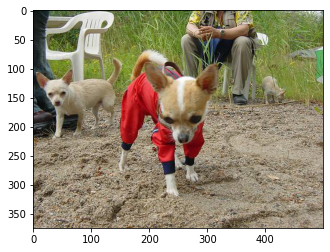

In [9]:
show_image(image_path="../data/val/n02085620-Chihuahua/n02085620_1152.jpg")

Display the first batch of 4 images.

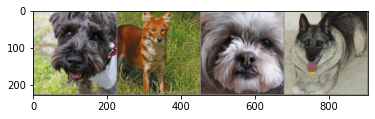

miniature_schnauzer
dhole
Lhasa
Norwegian_elkhound


In [10]:
# Get some random training images
dataiter = iter(dataloaders["val"])
images, labels = dataiter.next()

# Show images
show_batch_of_images(torchvision.utils.make_grid(images))
# Print labels
print("\n".join("%s" % class_names[labels[j]].split("-")[1] for j in range(4)))

### Create and Register AML Dataset

Register the data as a file dataset in the AML workspace for easy accessibility during training.

In [11]:
# Create a dataset object from the datastore location
dataset = Dataset.File.from_files(path=(datastore, "data/stanford_dogs"))

In [12]:
# Register the dataset
dataset = dataset.register(workspace=ws,
                           name="stanford-dogs-dataset",
                           description="stanford dogs dataset containing training, validation and test data",
                           create_new_version=True)